# Imports

In [1]:
import numpy as np

# GAN Model

### Generator

In [2]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Concatenate, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU, Activation
from keras.models import Model
from keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam

# Generator (U-Net)
def define_generator(input_shape=(512,512,3)):
    init = RandomNormal(stddev=0.2, seed=1234)
    inputs = Input(shape=input_shape)
    
    # Encoding path
    conv1 = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(inputs)
    conv1 = LeakyReLU(alpha=0.2)(conv1)
 
    conv2 = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv1)
    conv2 = BatchNormalization()(conv2, training=True)
    conv2 = LeakyReLU(alpha=0.2)(conv2)
    
    conv3 = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv2)
    conv3 = BatchNormalization()(conv3, training=True)
    conv3 = LeakyReLU(alpha=0.2)(conv3)
    
    conv4 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv3)
    conv4 = BatchNormalization()(conv4, training=True)
    conv4 = LeakyReLU(alpha=0.2)(conv4)
    
    conv5 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv4)
    conv5 = BatchNormalization()(conv5, training=True)
    conv5 = LeakyReLU(alpha=0.2)(conv5)
    
    conv6 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv5)
    conv6 = BatchNormalization()(conv6, training=True)
    conv6 = LeakyReLU(alpha=0.2)(conv6)

    conv7 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv6)
    conv7 = BatchNormalization()(conv7, training=True)
    conv7 = LeakyReLU(alpha=0.2)(conv7)

    
    # Bottleneck Layer
    
    bottle = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv7)
    bottle = Activation('relu')(bottle)
    
    # Decoding path

    convT7 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(bottle)
    convT7 = BatchNormalization()(convT7, training=True)
    convT7 = Dropout(0.5)(convT7, training=True)
    convT7 = Concatenate()([convT7, conv7])
    convT7 = Activation('relu')(convT7)
    
    convT6 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT7)
    convT6 = BatchNormalization()(convT6, training=True)
    convT6 = Dropout(0.5)(convT6, training=True)
    convT6 = Concatenate()([convT6, conv6])
    convT6 = Activation('relu')(convT6)

    convT5 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT6)
    convT5 = BatchNormalization()(convT5, training=True)
    convT5 = Dropout(0.5)(convT5, training=True)
    convT5 = Concatenate()([convT5, conv5])
    convT5 = Activation('relu')(convT5)
    
    convT4 = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT5)
    convT4 = BatchNormalization()(convT4, training=True)
    convT4 = Concatenate()([convT4, conv4])
    convT4 = Activation('relu')(convT4)
    
    convT3 = Conv2DTranspose(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT4)
    convT3 = BatchNormalization()(convT3, training=True)
    convT3 = Concatenate()([convT3, conv3])
    convT3 = Activation('relu')(convT3)
    
    convT2 = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT3)
    convT2 = BatchNormalization()(convT2, training=True)
    convT2 = Concatenate()([convT2, conv2])
    convT2 = Activation('relu')(convT2)
    
    convT1 = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT2)
    convT1 = BatchNormalization()(convT1, training=True)
    convT1 = Concatenate()([convT1, conv1])
    convT1 = Activation('relu')(convT1)   
    
    out = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(convT1)
    out = Activation('tanh')(out)
    
    generator = Model(inputs=inputs, outputs=out)
    
    return generator

### Discriminator

In [38]:
# Discriminator (CNN)
def define_discriminator(image_shape):
    
    init = RandomNormal(stddev=0.2, seed=1234)
    in_src_image = Input(shape=image_shape)
    in_target_image = Input(shape=(512,512,1))
    merged = Concatenate()([in_src_image,in_target_image])
    
    conv1 = Conv2D(64, (4,4), strides=(2,2),padding='same', kernel_initializer=init)(merged)
    conv1 = LeakyReLU(alpha=0.2)(conv1)
    
    conv2 = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(alpha=0.2)(conv2)
    
    conv3 = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(alpha=0.2)(conv3)
    
    conv4 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv3)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU(alpha=0.2)(conv4)
    
    conv5 = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(conv4)
    conv5 = BatchNormalization()(conv5)
    conv5 = LeakyReLU(alpha=0.2)(conv5)
    
    conv6 = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(conv5)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU(alpha=0.2)(conv6)
    
    out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(conv6)
    out = Activation('sigmoid')(out)
    
    discriminator = Model(inputs=[in_src_image,in_target_image], outputs=out)
    opt = Adam(learning_rate=0.0001, beta_1=0.5)
    discriminator.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
    
    return discriminator

## Custom Loss Function

### Persistent Homology

In [39]:
import tensorflow as tf
import numpy as np
from ripser import ripser
from persim import wasserstein

def persistence_loss(real_image, generated_image):
    # Convert the tensor objects to NumPy arrays
    real_image = real_image[0].numpy()
    generated_image = generated_image[0].numpy()

    # Compute the persistence diagrams for both images
    real_diagrams = ripser(real_image, maxdim=1)['dgms']
    generated_diagrams = ripser(generated_image, maxdim=1)['dgms']
    
    # Compute the Wasserstein distance between the two diagrams
    loss = wasserstein(real_diagrams[1], generated_diagrams[1])
    
    # Return the loss as a TensorFlow tensor object
    return loss


In [ ]:
import numpy as np
import ripserplusplus as rpp
from persim import wasserstein

def persistence_loss(real_image, generated_image):

    real_image = real_image[0].numpy()
    generated_image = generated_image[0].numpy()

    # Compute the persistence diagrams for both images
    real_diagrams = rpp.run("--format point-cloud --dim 1", real_image)[1]
    generated_diagrams = rpp.run("--format point-cloud --dim 1", generated_image)[1]

    real_persistence = np.array([(pair['birth'], pair['death']) for pair in real_diagrams], dtype=np.float32)
    generated_persistence = np.array([(pair['birth'], pair['death']) for pair in generated_diagrams], dtype=np.float32)
    
    # Compute the Wasserstein distance between the two diagrams
    loss = wasserstein(real_persistence, generated_persistence)
    
    # Return the loss as a TensorFlow tensor object
    return loss

### Connected Components and Road Loops with MAE

In [40]:
def hole_counter(img):
    # Scale the image values to the range [0, 255]
    img = (img + 1) * 127.5
    img = img.astype(np.uint8)

    # Apply morphological closing to fill any small gaps or holes
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    # Apply morphological opening to remove small disconnected regions
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

    # Find the contours in the binary image
    contours, hierarchy = cv2.findContours(opened, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the contours and count the number of "holes"
    hole_count = 0
    for i in range(len(contours)):
        parent = hierarchy[0][i][3]
        if parent != -1:
            area = cv2.contourArea(contours[i])
            if area > 10: # adjust the threshold value as needed
                hole_count += 1
#                 (x, y), radius = cv2.minEnclosingCircle(contours[i])
#                 center = (int(x), int(y))
#                 radius = int(radius)
#                 # Draw a circle around the hole
#                 mask = cv2.circle(img, center, radius, (255, 0, 0), 2)

#     print("Number of holes:", hole_count)

#     # Display the image with circles around the holes
#     plt.imshow(mask, cmap="gray")
#     plt.show()

    return hole_count

In [41]:
from skimage import measure, io
import numpy as np
def num_connected_components(y_true):
    # Convert pixel values to binary
    y_true = (y_true > 0).astype(np.uint8)
    
    # Find connected components
    labels = measure.label(y_true)
    num_components = len(np.unique(labels)) - 1
    
    return num_components

In [42]:
def mean_absolute_error(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

In [43]:
def composite_loss(y_true, y_pred):

    mae = mean_absolute_error(y_true, y_pred)
    cc = tf.abs(tf.cast(num_connected_components(y_true[0].numpy()),tf.float32) - tf.cast(num_connected_components(y_pred[0].numpy()),tf.float32))
    hc = tf.abs(tf.cast(hole_counter(y_true[0].numpy()),tf.float32) - tf.cast(hole_counter(y_pred[0].numpy()),tf.float32))
    return mae + 2*cc + 4*hc

# Model train functions

In [142]:
def define_gan(g_model, d_model, image_shape):
    for layer in d_model.layers:
        if not isinstance(layer, BatchNormalization):
            layer.trainable = False
            
    in_src = Input(shape=image_shape)
    gen_out = g_model(in_src)
    dis_out = d_model([in_src, gen_out])
    model = Model(in_src, [dis_out, gen_out])
    
    # Compile the model with the binary crossentropy and persistence losses, and their respective weights
    opt = Adam(learning_rate=0.0001, beta_1=0.5)
    model.compile(loss=['binary_crossentropy', composite_loss], optimizer=opt, loss_weights=[1, 100], run_eagerly=True)
    
    return model

In [143]:
def generate_real_samples(dataset, n_samples, patch_shape):
    trainA, trainB = dataset
    ix = np.random.randint(0, trainA.shape[0], n_samples)
    X1, X2 = trainA[ix], trainB[ix]
    y = np.ones((n_samples, patch_shape, patch_shape, 1))
    return [X1, X2], y

In [144]:
def generate_fake_samples(g_model, samples, patch_shape):
    X = g_model.predict(samples)
    y = np.zeros((len(X), patch_shape, patch_shape, 1))
    return X, y

In [145]:
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1, n_patch=16):
    trainA, trainB = dataset
    bat_per_epo = int(len(trainA) / n_batch)
    n_steps = bat_per_epo * n_epochs
    for i in range(n_steps):
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        p_loss,_,_ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        print('>%s, d1[%.3f] d2[%.3f] g[%.3f]' % (f'{i//796} epoch', d_loss1, d_loss2, p_loss))
    g_model.save_weights('generators/cc_hc_120.h5')
    d_model.save_weights('discriminators/cc_hc_120.h5')

In [146]:
image_shape = (512,512,3)
g_model = define_generator(image_shape)
d_model = define_discriminator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

# Dataset Loading and Normaliztion

In [15]:
from skimage import io
import cv2
import numpy as np
import os

def load_images(og_img_path, seg_path):
    i=0
    og_images, label_images = list(),list()
    for file in os.listdir(seg_path):
        img_path = os.path.join(og_img_path, file+'f')
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        og_images.append(img)
    
        label_path = os.path.join(seg_path,file)
        label_img = io.imread(label_path)
        label_images.append(label_img)

        i +=1 
        if i%100 == 0:
          print(i)
    
    return [np.asarray(og_images), np.asarray(label_images)]

In [16]:
[src_images, tar_images] = load_images('roadsdb/enhanced_images', 'roadsdb/new_train_labels')

100
200
300
400
500
600
700


In [17]:
[val_src, val_tar] = load_images('roadsdb/enhanced_val', 'roadsdb/new_val_labels')

In [18]:
def preprocess_data(data):
	X1, X2 = data[0], data[1]
    
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

In [19]:
dataset = preprocess_data([src_images, tar_images])
val_dataset = preprocess_data([val_src, val_tar])

# Model Training

In [148]:
g_model.load_weights("generators/cc_hc_100.h5")
d_model.load_weights("discriminators/cc_hc_100.h5")

In [ ]:
#Done epochs(mae) - 100
#Done epochs(cc) - 100
#Done epochs(hc) - 100
#Done epochs(cc_hc) - 100
from datetime import datetime 
start1 = datetime.now()
train(d_model, g_model, gan_model, dataset, n_epochs=20, n_batch=1)
stop1 = datetime.now()
execution_time = stop1-start1
print("Execution time is: ", execution_time)

>0 epoch, d1[0.200] d2[0.438] g[602.844]
>0 epoch, d1[0.161] d2[0.293] g[1004.564]
>0 epoch, d1[0.359] d2[0.375] g[802.242]
>0 epoch, d1[0.184] d2[0.262] g[1603.390]
>0 epoch, d1[0.196] d2[0.487] g[1403.999]
>0 epoch, d1[0.155] d2[0.328] g[2206.260]
>0 epoch, d1[0.169] d2[0.211] g[3408.224]
>0 epoch, d1[0.523] d2[0.217] g[802.251]
>0 epoch, d1[0.363] d2[0.201] g[2203.501]
>0 epoch, d1[0.417] d2[0.306] g[200.815]
>0 epoch, d1[0.228] d2[0.350] g[1201.888]
>0 epoch, d1[0.402] d2[0.263] g[802.861]
>0 epoch, d1[0.442] d2[0.288] g[200.866]
>0 epoch, d1[0.171] d2[0.357] g[1202.300]
>0 epoch, d1[0.143] d2[0.221] g[2003.717]
>0 epoch, d1[0.286] d2[0.310] g[802.277]
>0 epoch, d1[0.319] d2[0.222] g[1603.048]
>0 epoch, d1[0.147] d2[0.297] g[404.217]
>0 epoch, d1[0.208] d2[0.602] g[3.489]
>0 epoch, d1[0.182] d2[0.303] g[2003.182]
>0 epoch, d1[0.141] d2[0.563] g[2407.643]
>0 epoch, d1[0.146] d2[0.201] g[1804.178]
>0 epoch, d1[0.143] d2[0.211] g[2004.327]
>0 epoch, d1[0.543] d2[0.251] g[402.058]
>0 e

>0 epoch, d1[0.237] d2[0.410] g[1403.588]
>0 epoch, d1[0.205] d2[0.479] g[1203.069]
>0 epoch, d1[0.191] d2[0.225] g[2005.236]
>0 epoch, d1[0.501] d2[0.256] g[1602.285]
>0 epoch, d1[0.365] d2[0.206] g[3006.058]
>0 epoch, d1[0.154] d2[0.212] g[2806.400]
>0 epoch, d1[0.206] d2[0.234] g[1603.695]
>0 epoch, d1[0.158] d2[0.205] g[1605.467]
>0 epoch, d1[0.182] d2[0.476] g[1602.623]
>0 epoch, d1[0.176] d2[0.230] g[202.943]
>0 epoch, d1[0.236] d2[0.209] g[2204.516]
>0 epoch, d1[0.176] d2[0.211] g[4007.103]
>0 epoch, d1[0.364] d2[0.323] g[1404.451]
>0 epoch, d1[0.164] d2[0.203] g[2203.871]
>0 epoch, d1[0.151] d2[0.719] g[802.092]
>0 epoch, d1[0.189] d2[0.205] g[1804.569]
>0 epoch, d1[0.199] d2[0.426] g[1802.757]
>0 epoch, d1[0.130] d2[0.213] g[4609.032]
>0 epoch, d1[0.210] d2[0.565] g[201.769]
>0 epoch, d1[0.251] d2[0.239] g[1607.158]
>0 epoch, d1[0.306] d2[0.288] g[2803.919]
>0 epoch, d1[0.575] d2[0.197] g[2001.727]
>0 epoch, d1[0.138] d2[0.271] g[1204.814]
>0 epoch, d1[0.206] d2[0.615] g[401.6

>0 epoch, d1[0.241] d2[0.200] g[8014.092]
>0 epoch, d1[0.199] d2[0.254] g[604.731]
>0 epoch, d1[0.425] d2[0.228] g[401.378]
>0 epoch, d1[0.498] d2[0.257] g[0.977]
>0 epoch, d1[0.216] d2[0.204] g[2004.690]
>0 epoch, d1[0.133] d2[0.207] g[5607.544]
>0 epoch, d1[0.175] d2[0.604] g[2402.854]
>0 epoch, d1[0.478] d2[0.279] g[401.278]
>0 epoch, d1[0.190] d2[0.259] g[602.674]
>0 epoch, d1[0.179] d2[0.622] g[1804.887]
>0 epoch, d1[0.272] d2[0.344] g[1202.578]
>0 epoch, d1[0.243] d2[0.412] g[1602.504]
>0 epoch, d1[0.301] d2[0.208] g[3403.489]
>0 epoch, d1[0.397] d2[0.235] g[1802.485]
>0 epoch, d1[0.253] d2[0.506] g[603.427]
>0 epoch, d1[0.493] d2[0.247] g[603.664]
>0 epoch, d1[0.248] d2[0.283] g[1803.488]
>0 epoch, d1[0.191] d2[0.384] g[1003.164]
>0 epoch, d1[0.303] d2[0.222] g[1602.205]
>0 epoch, d1[0.231] d2[0.528] g[1.252]
>0 epoch, d1[0.134] d2[0.407] g[1204.141]
>0 epoch, d1[0.229] d2[0.279] g[1203.917]
>0 epoch, d1[0.202] d2[0.272] g[1202.443]
>0 epoch, d1[0.193] d2[0.256] g[1003.478]
>0 e

>0 epoch, d1[0.126] d2[0.196] g[2603.667]
>0 epoch, d1[0.149] d2[0.426] g[2405.804]
>0 epoch, d1[0.156] d2[0.197] g[2807.392]
>0 epoch, d1[0.139] d2[0.197] g[5007.678]
>0 epoch, d1[0.140] d2[0.207] g[8009.560]
>0 epoch, d1[0.243] d2[0.328] g[2003.556]
>0 epoch, d1[0.250] d2[0.326] g[2605.602]
>0 epoch, d1[0.188] d2[0.259] g[1803.594]
>0 epoch, d1[0.169] d2[0.192] g[4006.580]
>0 epoch, d1[0.172] d2[0.317] g[2404.589]
>0 epoch, d1[0.180] d2[0.310] g[403.362]
>0 epoch, d1[0.587] d2[0.191] g[1202.957]
>0 epoch, d1[0.165] d2[0.191] g[3404.685]
>0 epoch, d1[0.181] d2[0.221] g[1203.997]
>0 epoch, d1[0.181] d2[0.492] g[3205.289]
>0 epoch, d1[0.191] d2[0.509] g[1003.967]
>0 epoch, d1[0.164] d2[0.193] g[4608.364]
>0 epoch, d1[0.277] d2[0.219] g[1603.833]
>0 epoch, d1[0.371] d2[0.216] g[204.775]
>0 epoch, d1[0.178] d2[0.339] g[2205.057]
>0 epoch, d1[0.205] d2[0.380] g[1001.731]
>0 epoch, d1[0.140] d2[0.282] g[1206.942]
>0 epoch, d1[0.157] d2[0.345] g[1803.113]
>0 epoch, d1[0.179] d2[0.257] g[402.

>0 epoch, d1[0.286] d2[0.343] g[602.859]
>0 epoch, d1[0.149] d2[0.218] g[1606.038]
>0 epoch, d1[0.148] d2[0.625] g[201.117]
>0 epoch, d1[0.144] d2[0.225] g[605.057]
>0 epoch, d1[0.162] d2[0.317] g[2203.095]
>0 epoch, d1[0.573] d2[0.252] g[803.888]
>0 epoch, d1[0.194] d2[0.196] g[2605.904]
>0 epoch, d1[0.177] d2[0.315] g[602.570]
>1 epoch, d1[0.168] d2[0.329] g[1002.380]
>1 epoch, d1[0.526] d2[0.251] g[2001.487]
>1 epoch, d1[0.517] d2[0.295] g[401.761]
>1 epoch, d1[0.160] d2[0.256] g[1803.279]
>1 epoch, d1[0.161] d2[0.368] g[1605.100]
>1 epoch, d1[0.510] d2[0.215] g[1802.324]
>1 epoch, d1[0.168] d2[0.198] g[4808.231]
>1 epoch, d1[0.494] d2[0.250] g[1402.385]
>1 epoch, d1[0.171] d2[0.266] g[2203.846]
>1 epoch, d1[0.501] d2[0.215] g[802.388]
>1 epoch, d1[0.440] d2[0.209] g[802.430]
>1 epoch, d1[0.133] d2[0.343] g[1404.809]
>1 epoch, d1[0.509] d2[0.240] g[2.231]
>1 epoch, d1[0.124] d2[0.463] g[2403.594]
>1 epoch, d1[0.206] d2[0.234] g[403.994]
>1 epoch, d1[0.142] d2[0.422] g[3.134]
>1 epoc

>1 epoch, d1[0.266] d2[0.297] g[2606.165]
>1 epoch, d1[0.441] d2[0.284] g[200.879]
>1 epoch, d1[0.200] d2[0.445] g[2403.584]
>1 epoch, d1[0.186] d2[0.248] g[1804.974]
>1 epoch, d1[0.227] d2[0.265] g[3006.450]
>1 epoch, d1[0.589] d2[0.203] g[601.620]
>1 epoch, d1[0.212] d2[0.210] g[2205.199]
>1 epoch, d1[0.155] d2[0.208] g[1204.939]
>1 epoch, d1[0.164] d2[0.277] g[1203.404]
>1 epoch, d1[0.341] d2[0.234] g[604.538]
>1 epoch, d1[0.127] d2[0.516] g[402.683]
>1 epoch, d1[0.217] d2[0.208] g[3205.224]
>1 epoch, d1[0.150] d2[0.279] g[6207.632]
>1 epoch, d1[0.153] d2[0.318] g[402.766]
>1 epoch, d1[0.557] d2[0.226] g[2.738]
>1 epoch, d1[0.411] d2[0.219] g[4.729]
>1 epoch, d1[0.449] d2[0.224] g[603.231]
>1 epoch, d1[0.127] d2[0.271] g[2004.262]
>1 epoch, d1[0.240] d2[0.349] g[2005.201]
>1 epoch, d1[0.132] d2[0.410] g[804.814]
>1 epoch, d1[0.169] d2[0.214] g[4207.856]
>1 epoch, d1[0.263] d2[0.297] g[3004.075]
>1 epoch, d1[0.490] d2[0.318] g[2.852]
>1 epoch, d1[0.161] d2[0.420] g[1204.008]
>1 epoch

>1 epoch, d1[0.278] d2[0.519] g[601.450]
>1 epoch, d1[0.472] d2[0.312] g[202.498]
>1 epoch, d1[0.188] d2[0.369] g[2404.926]
>1 epoch, d1[0.216] d2[0.258] g[3208.177]
>1 epoch, d1[0.160] d2[0.217] g[1403.319]
>1 epoch, d1[0.176] d2[0.323] g[2206.320]
>1 epoch, d1[0.184] d2[0.359] g[2003.572]
>1 epoch, d1[0.441] d2[0.216] g[603.882]
>1 epoch, d1[0.274] d2[0.229] g[3004.673]
>1 epoch, d1[0.139] d2[0.437] g[1604.172]
>1 epoch, d1[0.315] d2[0.357] g[1004.007]
>1 epoch, d1[0.326] d2[0.258] g[1404.024]
>1 epoch, d1[0.197] d2[0.218] g[2605.516]
>1 epoch, d1[0.491] d2[0.233] g[402.557]
>1 epoch, d1[0.174] d2[0.321] g[1605.272]
>1 epoch, d1[0.137] d2[0.600] g[3004.804]
>1 epoch, d1[0.337] d2[0.308] g[2.949]
>1 epoch, d1[0.301] d2[0.332] g[1202.860]
>1 epoch, d1[0.274] d2[0.233] g[3604.057]
>1 epoch, d1[0.158] d2[0.399] g[2606.280]
>1 epoch, d1[0.197] d2[0.502] g[802.295]
>1 epoch, d1[0.272] d2[0.207] g[4804.767]
>1 epoch, d1[0.452] d2[0.224] g[602.229]
>1 epoch, d1[0.325] d2[0.208] g[3806.104]
>

>1 epoch, d1[0.310] d2[0.380] g[1003.287]
>1 epoch, d1[0.437] d2[0.288] g[202.074]
>1 epoch, d1[0.397] d2[0.336] g[2.191]
>1 epoch, d1[0.162] d2[0.345] g[804.138]
>1 epoch, d1[0.227] d2[0.310] g[1002.952]
>1 epoch, d1[0.237] d2[0.425] g[603.225]
>1 epoch, d1[0.192] d2[0.269] g[804.231]
>1 epoch, d1[0.195] d2[0.218] g[3806.495]
>1 epoch, d1[0.238] d2[0.399] g[402.806]
>1 epoch, d1[0.330] d2[0.420] g[402.148]
>1 epoch, d1[0.194] d2[0.225] g[3204.671]
>1 epoch, d1[0.314] d2[0.311] g[602.041]
>1 epoch, d1[0.205] d2[0.441] g[402.895]
>1 epoch, d1[0.157] d2[0.306] g[2606.039]
>1 epoch, d1[0.164] d2[0.349] g[1403.635]
>1 epoch, d1[0.321] d2[0.285] g[2806.071]
>1 epoch, d1[0.246] d2[0.283] g[802.365]
>1 epoch, d1[0.359] d2[0.229] g[4211.431]
>1 epoch, d1[0.499] d2[0.220] g[1.729]
>1 epoch, d1[0.317] d2[0.450] g[1.267]
>1 epoch, d1[0.243] d2[0.384] g[1002.077]
>1 epoch, d1[0.158] d2[0.220] g[2606.602]
>1 epoch, d1[0.225] d2[0.226] g[5407.135]
>1 epoch, d1[0.436] d2[0.289] g[0.856]
>1 epoch, d1[

>1 epoch, d1[0.311] d2[0.364] g[1602.735]
>1 epoch, d1[0.148] d2[0.536] g[2203.589]
>1 epoch, d1[0.196] d2[0.513] g[402.249]
>1 epoch, d1[0.420] d2[0.229] g[1604.554]
>1 epoch, d1[0.291] d2[0.261] g[2403.862]
>1 epoch, d1[0.221] d2[0.513] g[1202.859]
>1 epoch, d1[0.177] d2[0.430] g[1604.608]
>1 epoch, d1[0.369] d2[0.342] g[3.363]
>1 epoch, d1[0.340] d2[0.312] g[1802.542]
>1 epoch, d1[0.210] d2[0.370] g[2604.777]
>1 epoch, d1[0.172] d2[0.420] g[2005.235]
>1 epoch, d1[0.395] d2[0.298] g[1202.322]
>1 epoch, d1[0.186] d2[0.246] g[3408.427]
>1 epoch, d1[0.207] d2[0.236] g[1806.306]
>1 epoch, d1[0.464] d2[0.232] g[1002.558]
>2 epoch, d1[0.412] d2[0.254] g[602.101]
>2 epoch, d1[0.204] d2[0.376] g[1804.436]
>2 epoch, d1[0.262] d2[0.327] g[2004.693]
>2 epoch, d1[0.439] d2[0.284] g[0.869]
>2 epoch, d1[0.153] d2[0.278] g[2804.721]
>2 epoch, d1[0.297] d2[0.259] g[1603.881]
>2 epoch, d1[0.312] d2[0.321] g[1803.635]
>2 epoch, d1[0.391] d2[0.306] g[402.820]
>2 epoch, d1[0.209] d2[0.276] g[1404.126]
>

>2 epoch, d1[0.419] d2[0.279] g[1202.833]
>2 epoch, d1[0.470] d2[0.267] g[2.118]
>2 epoch, d1[0.369] d2[0.360] g[1.384]
>2 epoch, d1[0.372] d2[0.263] g[602.433]
>2 epoch, d1[0.337] d2[0.295] g[2603.083]
>2 epoch, d1[0.424] d2[0.295] g[800.917]
>2 epoch, d1[0.215] d2[0.303] g[202.672]
>2 epoch, d1[0.149] d2[0.527] g[1607.713]
>2 epoch, d1[0.150] d2[0.273] g[3204.386]
>2 epoch, d1[0.439] d2[0.347] g[2.141]
>2 epoch, d1[0.329] d2[0.266] g[1804.849]
>2 epoch, d1[0.366] d2[0.306] g[2002.023]
>2 epoch, d1[0.206] d2[0.382] g[2406.443]
>2 epoch, d1[0.358] d2[0.247] g[402.917]
>2 epoch, d1[0.135] d2[0.465] g[802.386]
>2 epoch, d1[0.182] d2[0.399] g[1402.704]
>2 epoch, d1[0.432] d2[0.270] g[401.110]
>2 epoch, d1[0.378] d2[0.309] g[202.948]
>2 epoch, d1[0.400] d2[0.287] g[601.319]
>2 epoch, d1[0.323] d2[0.266] g[2812.735]
>2 epoch, d1[0.256] d2[0.246] g[2403.321]
>2 epoch, d1[0.262] d2[0.351] g[1202.924]
>2 epoch, d1[0.260] d2[0.400] g[802.093]
>2 epoch, d1[0.210] d2[0.455] g[1204.050]
>2 epoch, 

>2 epoch, d1[0.398] d2[0.434] g[401.601]
>2 epoch, d1[0.185] d2[0.283] g[803.199]
>2 epoch, d1[0.169] d2[0.236] g[2003.709]
>2 epoch, d1[0.232] d2[0.237] g[3002.543]
>2 epoch, d1[0.171] d2[0.521] g[401.129]
>2 epoch, d1[0.165] d2[0.248] g[1203.813]
>2 epoch, d1[0.267] d2[0.365] g[802.893]
>2 epoch, d1[0.343] d2[0.327] g[401.885]
>2 epoch, d1[0.160] d2[0.245] g[2602.176]
>2 epoch, d1[0.171] d2[0.490] g[2604.402]
>2 epoch, d1[0.240] d2[0.460] g[1802.714]
>2 epoch, d1[0.288] d2[0.346] g[3.664]
>2 epoch, d1[0.224] d2[0.301] g[602.896]
>2 epoch, d1[0.411] d2[0.316] g[202.469]
>2 epoch, d1[0.172] d2[0.245] g[5607.673]
>2 epoch, d1[0.284] d2[0.376] g[403.188]
>2 epoch, d1[0.299] d2[0.290] g[802.710]
>2 epoch, d1[0.148] d2[0.639] g[202.970]
>2 epoch, d1[0.255] d2[0.231] g[2203.504]
>2 epoch, d1[0.369] d2[0.247] g[2603.150]
>2 epoch, d1[0.206] d2[0.341] g[2003.681]
>2 epoch, d1[0.153] d2[0.236] g[1606.746]
>2 epoch, d1[0.143] d2[0.611] g[2204.869]
>2 epoch, d1[0.203] d2[0.310] g[802.348]
>2 epo

>2 epoch, d1[0.166] d2[0.446] g[1404.225]
>2 epoch, d1[0.447] d2[0.249] g[602.669]
>2 epoch, d1[0.315] d2[0.319] g[402.747]
>2 epoch, d1[0.219] d2[0.243] g[803.186]
>2 epoch, d1[0.313] d2[0.319] g[606.056]
>2 epoch, d1[0.198] d2[0.245] g[4804.667]
>2 epoch, d1[0.172] d2[0.300] g[1806.089]
>2 epoch, d1[0.211] d2[0.620] g[802.761]
>2 epoch, d1[0.164] d2[0.252] g[2007.789]
>2 epoch, d1[0.216] d2[0.294] g[1004.175]
>2 epoch, d1[0.209] d2[0.357] g[2003.256]
>2 epoch, d1[0.239] d2[0.381] g[403.896]
>2 epoch, d1[0.158] d2[0.245] g[1003.406]
>2 epoch, d1[0.437] d2[0.273] g[401.249]
>2 epoch, d1[0.368] d2[0.237] g[5006.048]
>2 epoch, d1[0.177] d2[0.347] g[4205.296]
>2 epoch, d1[0.507] d2[0.234] g[201.541]
>2 epoch, d1[0.180] d2[0.317] g[404.078]
>2 epoch, d1[0.342] d2[0.318] g[1202.896]
>2 epoch, d1[0.486] d2[0.263] g[401.110]
>2 epoch, d1[0.300] d2[0.262] g[604.582]
>2 epoch, d1[0.172] d2[0.649] g[201.147]
>2 epoch, d1[0.187] d2[0.263] g[1602.779]
>2 epoch, d1[0.171] d2[0.562] g[2204.055]
>2 e

>2 epoch, d1[0.226] d2[0.485] g[1003.635]
>2 epoch, d1[0.236] d2[0.474] g[801.549]
>2 epoch, d1[0.195] d2[0.363] g[1203.768]
>2 epoch, d1[0.245] d2[0.328] g[804.303]
>2 epoch, d1[0.223] d2[0.236] g[4407.734]
>2 epoch, d1[0.361] d2[0.319] g[402.478]
>2 epoch, d1[0.156] d2[0.638] g[1003.072]
>2 epoch, d1[0.218] d2[0.455] g[402.065]
>2 epoch, d1[0.165] d2[0.253] g[803.189]
>2 epoch, d1[0.224] d2[0.275] g[1405.262]
>2 epoch, d1[0.286] d2[0.255] g[2206.868]
>2 epoch, d1[0.253] d2[0.424] g[1004.531]
>2 epoch, d1[0.175] d2[0.234] g[1404.893]
>2 epoch, d1[0.289] d2[0.417] g[2203.199]
>2 epoch, d1[0.239] d2[0.335] g[803.660]
>2 epoch, d1[0.385] d2[0.229] g[2802.561]
>2 epoch, d1[0.278] d2[0.258] g[1204.017]
>2 epoch, d1[0.444] d2[0.324] g[201.360]
>2 epoch, d1[0.223] d2[0.489] g[1402.258]
>3 epoch, d1[0.259] d2[0.318] g[402.008]
>3 epoch, d1[0.351] d2[0.293] g[1402.507]
>3 epoch, d1[0.234] d2[0.568] g[201.817]
>3 epoch, d1[0.469] d2[0.274] g[801.410]
>3 epoch, d1[0.244] d2[0.467] g[1002.383]
>3

>3 epoch, d1[0.295] d2[0.245] g[2404.006]
>3 epoch, d1[0.356] d2[0.287] g[802.490]
>3 epoch, d1[0.212] d2[0.252] g[4008.092]
>3 epoch, d1[0.216] d2[0.271] g[804.829]
>3 epoch, d1[0.217] d2[0.328] g[1404.058]
>3 epoch, d1[0.165] d2[0.531] g[1404.315]
>3 epoch, d1[0.325] d2[0.276] g[802.684]
>3 epoch, d1[0.238] d2[0.426] g[1604.375]
>3 epoch, d1[0.179] d2[0.339] g[1003.673]
>3 epoch, d1[0.303] d2[0.316] g[2203.373]
>3 epoch, d1[0.345] d2[0.232] g[1203.652]
>3 epoch, d1[0.225] d2[0.231] g[1806.272]
>3 epoch, d1[0.224] d2[0.475] g[1402.463]
>3 epoch, d1[0.203] d2[0.373] g[3004.618]
>3 epoch, d1[0.351] d2[0.241] g[801.682]
>3 epoch, d1[0.301] d2[0.432] g[1.517]
>3 epoch, d1[0.307] d2[0.308] g[1801.921]
>3 epoch, d1[0.214] d2[0.238] g[2606.815]
>3 epoch, d1[0.185] d2[0.450] g[2203.022]
>3 epoch, d1[0.178] d2[0.232] g[5608.222]
>3 epoch, d1[0.259] d2[0.403] g[804.090]
>3 epoch, d1[0.238] d2[0.257] g[4605.196]
>3 epoch, d1[0.308] d2[0.370] g[1401.776]
>3 epoch, d1[0.161] d2[0.315] g[1406.673]


>3 epoch, d1[0.325] d2[0.308] g[9213.316]
>3 epoch, d1[0.166] d2[0.219] g[802.966]
>3 epoch, d1[0.243] d2[0.545] g[1403.107]
>3 epoch, d1[0.250] d2[0.306] g[603.707]
>3 epoch, d1[0.183] d2[0.351] g[1203.185]
>3 epoch, d1[0.344] d2[0.455] g[403.101]
>3 epoch, d1[0.300] d2[0.224] g[3404.934]
>3 epoch, d1[0.266] d2[0.485] g[2603.214]
>3 epoch, d1[0.188] d2[0.223] g[604.963]
>3 epoch, d1[0.238] d2[0.207] g[2406.365]
>3 epoch, d1[0.342] d2[0.255] g[2402.451]
>3 epoch, d1[0.506] d2[0.224] g[201.537]
>3 epoch, d1[0.173] d2[0.341] g[4007.449]
>3 epoch, d1[0.221] d2[0.224] g[1005.296]
>3 epoch, d1[0.165] d2[0.248] g[10409.862]
>3 epoch, d1[0.168] d2[0.357] g[202.280]
>3 epoch, d1[0.179] d2[0.213] g[3203.675]
>3 epoch, d1[0.151] d2[0.211] g[5003.101]
>3 epoch, d1[0.307] d2[0.404] g[401.705]
>3 epoch, d1[0.409] d2[0.372] g[202.626]
>3 epoch, d1[0.304] d2[0.340] g[2603.682]
>3 epoch, d1[0.185] d2[0.218] g[1004.269]
>3 epoch, d1[0.272] d2[0.218] g[1203.307]
>3 epoch, d1[0.254] d2[0.523] g[1603.140]

>3 epoch, d1[0.282] d2[0.238] g[204.740]
>3 epoch, d1[0.231] d2[0.307] g[1403.866]
>3 epoch, d1[0.190] d2[0.358] g[2004.080]
>3 epoch, d1[0.168] d2[0.207] g[1803.101]
>3 epoch, d1[0.411] d2[0.412] g[1202.573]
>3 epoch, d1[0.431] d2[0.268] g[1002.877]
>3 epoch, d1[0.502] d2[0.217] g[1604.339]
>3 epoch, d1[0.285] d2[0.309] g[1402.088]
>3 epoch, d1[0.231] d2[0.306] g[2203.772]
>3 epoch, d1[0.211] d2[0.303] g[2403.263]
>3 epoch, d1[0.172] d2[0.265] g[2003.967]
>3 epoch, d1[0.162] d2[0.260] g[1204.184]
>3 epoch, d1[0.328] d2[0.364] g[602.735]
>3 epoch, d1[0.270] d2[0.239] g[1602.427]
>3 epoch, d1[0.238] d2[0.248] g[1404.888]
>3 epoch, d1[0.322] d2[0.380] g[9612.812]
>3 epoch, d1[0.155] d2[0.505] g[1403.481]
>3 epoch, d1[0.161] d2[0.323] g[1605.931]
>3 epoch, d1[0.286] d2[0.207] g[3804.851]
>3 epoch, d1[0.184] d2[0.254] g[6813.230]
>3 epoch, d1[0.216] d2[0.240] g[1002.419]
>3 epoch, d1[0.177] d2[0.240] g[2605.521]
>3 epoch, d1[0.277] d2[0.383] g[1203.295]
>3 epoch, d1[0.185] d2[0.234] g[2406

>3 epoch, d1[0.209] d2[0.395] g[1805.087]
>3 epoch, d1[0.495] d2[0.243] g[602.461]
>3 epoch, d1[0.229] d2[0.220] g[2004.201]
>3 epoch, d1[0.288] d2[0.319] g[9212.753]
>3 epoch, d1[0.215] d2[0.378] g[402.705]
>3 epoch, d1[0.176] d2[0.337] g[1604.261]
>3 epoch, d1[0.268] d2[0.349] g[1603.785]
>3 epoch, d1[0.192] d2[0.558] g[3203.157]
>3 epoch, d1[0.183] d2[0.232] g[4005.390]
>3 epoch, d1[0.185] d2[0.321] g[1804.704]
>3 epoch, d1[0.179] d2[0.203] g[6409.160]
>3 epoch, d1[0.188] d2[0.217] g[6410.379]
>3 epoch, d1[0.324] d2[0.393] g[1403.730]
>3 epoch, d1[0.187] d2[0.207] g[804.832]
>3 epoch, d1[0.550] d2[0.241] g[1601.454]
>3 epoch, d1[0.208] d2[0.236] g[3605.211]
>3 epoch, d1[0.238] d2[0.221] g[2604.917]
>3 epoch, d1[0.396] d2[0.238] g[1403.100]
>3 epoch, d1[0.412] d2[0.272] g[1406.358]
>3 epoch, d1[0.196] d2[0.471] g[602.549]
>3 epoch, d1[0.218] d2[0.390] g[1002.934]
>3 epoch, d1[0.303] d2[0.322] g[1.328]
>3 epoch, d1[0.371] d2[0.211] g[2804.654]
>3 epoch, d1[0.173] d2[0.237] g[1205.064]

>4 epoch, d1[0.273] d2[0.244] g[1.967]
>4 epoch, d1[0.178] d2[0.515] g[4810.006]
>4 epoch, d1[0.162] d2[0.328] g[1003.620]
>4 epoch, d1[0.219] d2[0.305] g[2004.481]
>4 epoch, d1[0.216] d2[0.204] g[5005.526]
>4 epoch, d1[0.357] d2[0.413] g[3.111]
>4 epoch, d1[0.274] d2[0.447] g[802.092]
>4 epoch, d1[0.195] d2[0.413] g[1005.381]
>4 epoch, d1[0.311] d2[0.203] g[6607.172]
>4 epoch, d1[0.277] d2[0.377] g[602.911]
>4 epoch, d1[0.180] d2[0.223] g[2402.677]
>4 epoch, d1[0.190] d2[0.538] g[2003.671]
>4 epoch, d1[0.353] d2[0.264] g[802.382]
>4 epoch, d1[0.278] d2[0.375] g[1205.851]
>4 epoch, d1[0.207] d2[0.406] g[1004.089]
>4 epoch, d1[0.223] d2[0.279] g[602.991]
>4 epoch, d1[0.412] d2[0.267] g[5409.614]
>4 epoch, d1[0.182] d2[0.500] g[1603.624]
>4 epoch, d1[0.182] d2[0.267] g[3405.637]
>4 epoch, d1[0.232] d2[0.383] g[403.343]
>4 epoch, d1[0.197] d2[0.278] g[3005.891]
>4 epoch, d1[0.511] d2[0.256] g[2.315]
>4 epoch, d1[0.554] d2[0.206] g[402.320]
>4 epoch, d1[0.381] d2[0.305] g[806.471]
>4 epoch

>4 epoch, d1[0.502] d2[0.272] g[602.145]
>4 epoch, d1[0.450] d2[0.259] g[602.153]
>4 epoch, d1[0.430] d2[0.318] g[1003.902]
>4 epoch, d1[0.345] d2[0.289] g[2603.283]
>4 epoch, d1[0.212] d2[0.469] g[3405.115]
>4 epoch, d1[0.353] d2[0.326] g[602.751]
>4 epoch, d1[0.186] d2[0.322] g[1204.237]
>4 epoch, d1[0.349] d2[0.338] g[1.436]
>4 epoch, d1[0.305] d2[0.234] g[1803.762]
>4 epoch, d1[0.209] d2[0.229] g[2406.183]
>4 epoch, d1[0.481] d2[0.218] g[5410.435]
>4 epoch, d1[0.206] d2[0.287] g[2606.244]
>4 epoch, d1[0.426] d2[0.271] g[601.794]
>4 epoch, d1[0.150] d2[0.221] g[4205.608]
>4 epoch, d1[0.198] d2[0.276] g[2603.792]
>4 epoch, d1[0.256] d2[0.233] g[9812.917]
>4 epoch, d1[0.149] d2[0.611] g[1002.475]
>4 epoch, d1[0.161] d2[0.549] g[1203.594]
>4 epoch, d1[0.348] d2[0.283] g[3.760]
>4 epoch, d1[0.211] d2[0.457] g[2803.902]
>4 epoch, d1[0.272] d2[0.379] g[1204.088]
>4 epoch, d1[0.336] d2[0.300] g[402.784]
>4 epoch, d1[0.209] d2[0.228] g[2806.497]
>4 epoch, d1[0.170] d2[0.264] g[1003.545]
>4 

>4 epoch, d1[0.209] d2[0.202] g[4006.754]
>4 epoch, d1[0.236] d2[0.409] g[1202.717]
>4 epoch, d1[0.272] d2[0.318] g[1202.341]
>4 epoch, d1[0.206] d2[0.498] g[3202.412]
>4 epoch, d1[0.374] d2[0.278] g[1402.212]
>4 epoch, d1[0.262] d2[0.272] g[2404.473]
>4 epoch, d1[0.178] d2[0.213] g[4205.168]
>4 epoch, d1[0.181] d2[0.345] g[2203.476]
>4 epoch, d1[0.167] d2[0.354] g[202.749]
>4 epoch, d1[0.338] d2[0.274] g[1003.016]
>4 epoch, d1[0.328] d2[0.309] g[2002.340]
>4 epoch, d1[0.192] d2[0.498] g[2404.086]
>4 epoch, d1[0.195] d2[0.202] g[2403.821]
>4 epoch, d1[0.368] d2[0.320] g[2003.421]
>4 epoch, d1[0.319] d2[0.437] g[3204.817]
>4 epoch, d1[0.231] d2[0.432] g[2403.096]
>4 epoch, d1[0.364] d2[0.227] g[1603.952]
>4 epoch, d1[0.287] d2[0.462] g[802.526]
>4 epoch, d1[0.169] d2[0.281] g[2609.785]
>4 epoch, d1[0.254] d2[0.212] g[1402.758]
>4 epoch, d1[0.525] d2[0.351] g[401.766]
>4 epoch, d1[0.282] d2[0.442] g[602.270]
>4 epoch, d1[0.333] d2[0.304] g[2003.691]
>4 epoch, d1[0.215] d2[0.221] g[4009.6

>4 epoch, d1[0.256] d2[0.391] g[403.104]
>4 epoch, d1[0.347] d2[0.313] g[602.288]
>4 epoch, d1[0.218] d2[0.328] g[1802.922]
>4 epoch, d1[0.237] d2[0.248] g[2004.540]
>4 epoch, d1[0.170] d2[0.343] g[603.029]
>4 epoch, d1[0.157] d2[0.331] g[1605.647]
>4 epoch, d1[0.537] d2[0.218] g[802.007]
>4 epoch, d1[0.348] d2[0.241] g[3203.928]
>4 epoch, d1[0.428] d2[0.218] g[1002.574]
>4 epoch, d1[0.167] d2[0.223] g[5407.355]
>4 epoch, d1[0.198] d2[0.253] g[1002.104]
>4 epoch, d1[0.171] d2[0.310] g[1002.550]
>4 epoch, d1[0.303] d2[0.261] g[1204.430]
>4 epoch, d1[0.306] d2[0.236] g[602.053]
>4 epoch, d1[0.194] d2[0.293] g[401.883]
>4 epoch, d1[0.365] d2[0.237] g[602.277]
>4 epoch, d1[0.175] d2[0.223] g[4006.477]
>4 epoch, d1[0.216] d2[0.376] g[4005.960]
>4 epoch, d1[0.164] d2[0.502] g[2207.417]
>4 epoch, d1[0.280] d2[0.225] g[202.401]
>4 epoch, d1[0.201] d2[0.420] g[1003.035]
>4 epoch, d1[0.254] d2[0.242] g[5807.090]
>4 epoch, d1[0.193] d2[0.239] g[204.292]
>4 epoch, d1[0.193] d2[0.304] g[2201.658]
>

>5 epoch, d1[0.621] d2[0.197] g[1.711]
>5 epoch, d1[0.343] d2[0.372] g[1803.026]
>5 epoch, d1[0.419] d2[0.245] g[603.134]
>5 epoch, d1[0.212] d2[0.575] g[2404.886]
>5 epoch, d1[0.309] d2[0.307] g[2404.416]
>5 epoch, d1[0.376] d2[0.379] g[1.190]
>5 epoch, d1[0.368] d2[0.489] g[601.331]
>5 epoch, d1[0.254] d2[0.303] g[5405.691]
>5 epoch, d1[0.208] d2[0.227] g[1003.026]
>5 epoch, d1[0.237] d2[0.287] g[2805.153]
>5 epoch, d1[0.168] d2[0.233] g[4005.065]
>5 epoch, d1[0.190] d2[0.269] g[801.786]
>5 epoch, d1[0.168] d2[0.293] g[2404.763]
>5 epoch, d1[0.538] d2[0.238] g[601.178]
>5 epoch, d1[0.163] d2[0.238] g[403.782]
>5 epoch, d1[0.267] d2[0.293] g[1802.396]
>5 epoch, d1[0.380] d2[0.206] g[1603.477]
>5 epoch, d1[0.142] d2[0.257] g[1406.647]
>5 epoch, d1[0.343] d2[0.424] g[1204.329]
>5 epoch, d1[0.150] d2[0.484] g[3804.210]
>5 epoch, d1[0.278] d2[0.330] g[3003.925]
>5 epoch, d1[0.306] d2[0.199] g[2603.753]
>5 epoch, d1[0.348] d2[0.341] g[1403.331]
>5 epoch, d1[0.268] d2[0.266] g[2603.867]
>5 

>5 epoch, d1[0.166] d2[0.402] g[402.982]
>5 epoch, d1[0.245] d2[0.397] g[1804.993]
>5 epoch, d1[0.372] d2[0.315] g[1204.284]
>5 epoch, d1[0.505] d2[0.211] g[8808.661]
>5 epoch, d1[0.288] d2[0.242] g[1405.362]
>5 epoch, d1[0.273] d2[0.318] g[1002.964]
>5 epoch, d1[0.201] d2[0.214] g[3606.380]
>5 epoch, d1[0.157] d2[0.217] g[1404.391]
>5 epoch, d1[0.169] d2[0.477] g[2203.175]
>5 epoch, d1[0.219] d2[0.434] g[4805.595]
>5 epoch, d1[0.185] d2[0.289] g[1206.660]
>5 epoch, d1[0.496] d2[0.316] g[802.187]
>5 epoch, d1[0.529] d2[0.221] g[202.625]
>5 epoch, d1[0.390] d2[0.297] g[603.256]
>5 epoch, d1[0.458] d2[0.219] g[807.673]
>5 epoch, d1[0.264] d2[0.237] g[403.104]
>5 epoch, d1[0.400] d2[0.213] g[1603.070]
>5 epoch, d1[0.138] d2[0.309] g[2005.877]
>5 epoch, d1[0.154] d2[0.513] g[2804.042]
>5 epoch, d1[0.216] d2[0.409] g[1604.052]
>5 epoch, d1[0.371] d2[0.340] g[1403.041]
>5 epoch, d1[0.345] d2[0.207] g[4604.992]
>5 epoch, d1[0.238] d2[0.228] g[1603.250]
>5 epoch, d1[0.418] d2[0.205] g[1801.840

>5 epoch, d1[0.483] d2[0.264] g[400.935]
>5 epoch, d1[0.147] d2[0.477] g[2804.138]
>5 epoch, d1[0.168] d2[0.328] g[2805.486]
>5 epoch, d1[0.218] d2[0.441] g[2204.095]
>5 epoch, d1[0.472] d2[0.241] g[201.297]
>5 epoch, d1[0.259] d2[0.230] g[403.840]
>5 epoch, d1[0.450] d2[0.276] g[807.792]
>5 epoch, d1[0.282] d2[0.251] g[1207.070]
>5 epoch, d1[0.277] d2[0.452] g[803.623]
>5 epoch, d1[0.304] d2[0.336] g[1003.507]
>5 epoch, d1[0.220] d2[0.238] g[3204.512]
>5 epoch, d1[0.168] d2[0.207] g[1805.573]
>5 epoch, d1[0.218] d2[0.331] g[1002.367]
>5 epoch, d1[0.358] d2[0.267] g[802.661]
>5 epoch, d1[0.167] d2[0.242] g[802.933]
>5 epoch, d1[0.291] d2[0.279] g[1.481]
>5 epoch, d1[0.384] d2[0.332] g[401.115]
>5 epoch, d1[0.182] d2[0.493] g[3004.671]
>5 epoch, d1[0.173] d2[0.380] g[1605.002]
>5 epoch, d1[0.357] d2[0.211] g[1803.883]
>5 epoch, d1[0.268] d2[0.468] g[1401.908]
>5 epoch, d1[0.235] d2[0.464] g[1802.802]
>5 epoch, d1[0.310] d2[0.211] g[1002.789]
>5 epoch, d1[0.187] d2[0.217] g[602.974]
>5 e

>5 epoch, d1[0.187] d2[0.239] g[1002.952]
>5 epoch, d1[0.158] d2[0.283] g[803.654]
>5 epoch, d1[0.407] d2[0.338] g[601.834]
>5 epoch, d1[0.516] d2[0.190] g[2802.083]
>5 epoch, d1[0.230] d2[0.220] g[1803.211]
>5 epoch, d1[0.218] d2[0.242] g[803.893]
>5 epoch, d1[0.148] d2[0.294] g[604.095]
>5 epoch, d1[0.211] d2[0.238] g[1803.594]
>5 epoch, d1[0.227] d2[0.269] g[1203.322]
>5 epoch, d1[0.395] d2[0.264] g[2004.164]
>5 epoch, d1[0.199] d2[0.565] g[2404.809]
>5 epoch, d1[0.278] d2[0.345] g[1803.051]
>5 epoch, d1[0.155] d2[0.286] g[2804.108]
>5 epoch, d1[0.478] d2[0.232] g[2801.106]
>5 epoch, d1[0.317] d2[0.415] g[1803.167]
>5 epoch, d1[0.311] d2[0.305] g[3204.712]
>5 epoch, d1[0.490] d2[0.228] g[1401.245]
>5 epoch, d1[0.252] d2[0.427] g[2002.717]
>5 epoch, d1[0.147] d2[0.220] g[3206.133]
>5 epoch, d1[0.233] d2[0.225] g[1202.752]
>5 epoch, d1[0.227] d2[0.415] g[2604.123]
>5 epoch, d1[0.174] d2[0.254] g[1804.925]
>5 epoch, d1[0.331] d2[0.210] g[2604.529]
>5 epoch, d1[0.249] d2[0.185] g[2604.0

>6 epoch, d1[0.315] d2[0.226] g[4005.546]
>6 epoch, d1[0.141] d2[0.433] g[3005.152]
>6 epoch, d1[0.357] d2[0.497] g[2203.486]
>6 epoch, d1[0.183] d2[0.353] g[1802.324]
>6 epoch, d1[0.227] d2[0.389] g[1203.795]
>6 epoch, d1[0.410] d2[0.214] g[803.289]
>6 epoch, d1[0.188] d2[0.325] g[1004.165]
>6 epoch, d1[0.148] d2[0.275] g[1603.349]
>6 epoch, d1[0.515] d2[0.245] g[401.170]
>6 epoch, d1[0.428] d2[0.250] g[807.583]
>6 epoch, d1[0.228] d2[0.332] g[1205.174]
>6 epoch, d1[0.283] d2[0.274] g[1403.811]
>6 epoch, d1[0.424] d2[0.309] g[1401.069]
>6 epoch, d1[0.529] d2[0.197] g[1601.700]
>6 epoch, d1[0.172] d2[0.284] g[1003.321]
>6 epoch, d1[0.199] d2[0.273] g[4003.252]
>6 epoch, d1[0.152] d2[0.284] g[4007.094]
>6 epoch, d1[0.380] d2[0.383] g[1002.552]
>6 epoch, d1[0.465] d2[0.271] g[200.951]
>6 epoch, d1[0.167] d2[0.316] g[4006.899]
>6 epoch, d1[0.215] d2[0.261] g[2804.841]
>6 epoch, d1[0.291] d2[0.305] g[4404.837]
>6 epoch, d1[0.166] d2[0.235] g[1604.234]
>6 epoch, d1[0.267] d2[0.309] g[404.09

>6 epoch, d1[0.277] d2[0.571] g[801.977]
>6 epoch, d1[0.206] d2[0.305] g[1201.859]
>6 epoch, d1[0.253] d2[0.355] g[2404.910]
>6 epoch, d1[0.206] d2[0.446] g[1.377]
>6 epoch, d1[0.417] d2[0.424] g[1004.066]
>6 epoch, d1[0.502] d2[0.219] g[6010.021]
>6 epoch, d1[0.201] d2[0.257] g[1202.884]
>6 epoch, d1[0.340] d2[0.439] g[1007.236]
>6 epoch, d1[0.174] d2[0.330] g[1406.714]
>6 epoch, d1[0.197] d2[0.265] g[6209.339]
>6 epoch, d1[0.201] d2[0.189] g[2602.610]
>6 epoch, d1[0.298] d2[0.288] g[2002.874]
>6 epoch, d1[0.156] d2[0.242] g[1404.471]
>6 epoch, d1[0.243] d2[0.309] g[404.500]
>6 epoch, d1[0.452] d2[0.257] g[401.347]
>6 epoch, d1[0.131] d2[0.340] g[1406.111]
>6 epoch, d1[0.407] d2[0.193] g[1003.879]
>6 epoch, d1[0.447] d2[0.210] g[1001.570]
>6 epoch, d1[0.224] d2[0.193] g[1805.326]
>6 epoch, d1[0.241] d2[0.207] g[1002.468]
>6 epoch, d1[0.130] d2[0.525] g[1002.244]
>6 epoch, d1[0.303] d2[0.437] g[1603.038]
>6 epoch, d1[0.234] d2[0.299] g[1004.520]
>6 epoch, d1[0.467] d2[0.270] g[400.932]

>6 epoch, d1[0.165] d2[0.470] g[202.159]
>6 epoch, d1[0.210] d2[0.171] g[3007.470]
>6 epoch, d1[0.229] d2[0.284] g[1203.992]
>6 epoch, d1[0.415] d2[0.203] g[3404.911]
>6 epoch, d1[0.356] d2[0.196] g[1403.633]
>6 epoch, d1[0.363] d2[0.494] g[1.468]
>6 epoch, d1[0.231] d2[0.435] g[1803.583]
>6 epoch, d1[0.155] d2[0.189] g[5208.509]
>6 epoch, d1[0.136] d2[0.230] g[4607.375]
>6 epoch, d1[0.143] d2[0.420] g[2004.465]
>6 epoch, d1[0.220] d2[0.240] g[3204.549]
>6 epoch, d1[0.515] d2[0.269] g[200.927]
>6 epoch, d1[0.246] d2[0.180] g[3805.431]
>6 epoch, d1[0.239] d2[0.313] g[3609.082]
>6 epoch, d1[0.423] d2[0.334] g[1.684]
>6 epoch, d1[0.174] d2[0.267] g[803.060]
>6 epoch, d1[0.187] d2[0.350] g[1202.843]
>6 epoch, d1[0.178] d2[0.205] g[2606.707]
>6 epoch, d1[0.317] d2[0.549] g[1001.398]
>6 epoch, d1[0.550] d2[0.191] g[602.105]
>6 epoch, d1[0.213] d2[0.318] g[1804.448]
>6 epoch, d1[0.206] d2[0.316] g[2803.253]
>6 epoch, d1[0.235] d2[0.236] g[2003.470]
>6 epoch, d1[0.158] d2[0.536] g[1404.184]
>6

>6 epoch, d1[0.149] d2[0.162] g[1804.207]
>6 epoch, d1[0.209] d2[0.292] g[2004.804]
>6 epoch, d1[0.270] d2[0.375] g[1205.238]
>6 epoch, d1[0.364] d2[0.286] g[1803.572]
>6 epoch, d1[0.152] d2[0.242] g[1004.269]
>6 epoch, d1[0.262] d2[0.246] g[2403.548]
>6 epoch, d1[0.212] d2[0.487] g[1403.802]
>6 epoch, d1[0.410] d2[0.236] g[1002.182]
>6 epoch, d1[0.202] d2[0.559] g[1003.896]
>6 epoch, d1[0.166] d2[0.423] g[1203.838]
>6 epoch, d1[0.393] d2[0.238] g[2602.655]
>6 epoch, d1[0.426] d2[0.456] g[802.786]
>6 epoch, d1[0.314] d2[0.197] g[204.810]
>6 epoch, d1[0.214] d2[0.161] g[4005.581]
>6 epoch, d1[0.324] d2[0.413] g[2403.686]
>6 epoch, d1[0.254] d2[0.409] g[3002.138]
>6 epoch, d1[0.172] d2[0.619] g[802.046]
>6 epoch, d1[0.304] d2[0.351] g[802.414]
>6 epoch, d1[0.228] d2[0.188] g[2404.068]
>6 epoch, d1[0.345] d2[0.223] g[1403.659]
>6 epoch, d1[0.197] d2[0.191] g[6407.443]
>6 epoch, d1[0.169] d2[0.380] g[1405.778]
>6 epoch, d1[0.153] d2[0.544] g[802.883]
>6 epoch, d1[0.201] d2[0.159] g[4206.79

>7 epoch, d1[0.198] d2[0.380] g[1603.800]
>7 epoch, d1[0.302] d2[0.300] g[1603.714]
>7 epoch, d1[0.363] d2[0.309] g[1203.668]
>7 epoch, d1[0.253] d2[0.315] g[1003.010]
>7 epoch, d1[0.225] d2[0.279] g[3604.286]
>7 epoch, d1[0.500] d2[0.257] g[200.970]
>7 epoch, d1[0.243] d2[0.342] g[3603.516]
>7 epoch, d1[0.230] d2[0.193] g[6008.152]
>7 epoch, d1[0.326] d2[0.225] g[1604.565]
>7 epoch, d1[0.167] d2[0.574] g[401.947]
>7 epoch, d1[0.190] d2[0.563] g[3804.527]
>7 epoch, d1[0.249] d2[0.262] g[202.961]
>7 epoch, d1[0.519] d2[0.280] g[1202.204]
>7 epoch, d1[0.256] d2[0.221] g[2004.828]
>7 epoch, d1[0.147] d2[0.315] g[5004.050]
>7 epoch, d1[0.296] d2[0.176] g[2203.745]
>7 epoch, d1[0.149] d2[0.209] g[1203.372]
>7 epoch, d1[0.400] d2[0.179] g[8209.302]
>7 epoch, d1[0.167] d2[0.434] g[5805.377]
>7 epoch, d1[0.228] d2[0.410] g[1403.912]
>7 epoch, d1[0.165] d2[0.301] g[3408.984]
>7 epoch, d1[0.311] d2[0.423] g[1002.680]
>7 epoch, d1[0.337] d2[0.295] g[1202.192]
>7 epoch, d1[0.198] d2[0.162] g[3203.

>7 epoch, d1[0.370] d2[0.198] g[8613.317]
>7 epoch, d1[0.122] d2[0.295] g[203.388]
>7 epoch, d1[0.170] d2[0.440] g[2403.511]
>7 epoch, d1[0.203] d2[0.188] g[2004.541]
>7 epoch, d1[0.210] d2[0.162] g[3604.660]
>7 epoch, d1[0.144] d2[0.159] g[5209.677]
>7 epoch, d1[0.255] d2[0.154] g[2006.785]
>7 epoch, d1[0.151] d2[0.165] g[2004.124]
>7 epoch, d1[0.142] d2[0.649] g[2603.033]
>7 epoch, d1[0.295] d2[0.220] g[1002.697]
>7 epoch, d1[0.139] d2[0.164] g[603.208]
>7 epoch, d1[0.153] d2[0.657] g[803.788]
>7 epoch, d1[0.205] d2[0.669] g[1801.666]
>7 epoch, d1[0.333] d2[0.226] g[202.375]
>7 epoch, d1[0.158] d2[0.331] g[1404.997]
>7 epoch, d1[0.192] d2[0.215] g[1802.395]
>7 epoch, d1[0.224] d2[0.178] g[1203.367]
>7 epoch, d1[0.548] d2[0.182] g[8014.479]
>7 epoch, d1[0.144] d2[0.193] g[4204.514]
>7 epoch, d1[0.324] d2[0.492] g[401.709]
>7 epoch, d1[0.170] d2[0.575] g[2403.060]
>7 epoch, d1[0.233] d2[0.444] g[1801.974]
>7 epoch, d1[0.228] d2[0.369] g[1402.303]
>7 epoch, d1[0.214] d2[0.390] g[2003.50

>7 epoch, d1[0.143] d2[0.651] g[3804.960]
>7 epoch, d1[0.282] d2[0.151] g[1002.285]
>7 epoch, d1[0.226] d2[0.697] g[201.625]
>7 epoch, d1[0.267] d2[0.517] g[1203.770]
>7 epoch, d1[0.214] d2[0.268] g[2004.529]
>7 epoch, d1[0.174] d2[0.155] g[1803.429]
>7 epoch, d1[0.234] d2[0.163] g[5006.972]
>7 epoch, d1[0.221] d2[0.440] g[3005.243]
>7 epoch, d1[0.168] d2[0.531] g[203.007]
>7 epoch, d1[0.305] d2[0.388] g[1204.167]
>7 epoch, d1[0.167] d2[0.445] g[604.975]
>7 epoch, d1[0.451] d2[0.270] g[1201.991]
>7 epoch, d1[0.426] d2[0.187] g[1002.987]
>7 epoch, d1[0.211] d2[0.388] g[804.500]
>7 epoch, d1[0.250] d2[0.338] g[6209.507]
>7 epoch, d1[0.384] d2[0.290] g[1200.763]
>7 epoch, d1[0.499] d2[0.162] g[4403.898]
>7 epoch, d1[0.398] d2[0.420] g[1203.405]
>7 epoch, d1[0.225] d2[0.352] g[1607.654]
>7 epoch, d1[0.222] d2[0.414] g[2003.772]
>7 epoch, d1[0.281] d2[0.375] g[3003.628]
>7 epoch, d1[0.457] d2[0.172] g[1802.808]
>7 epoch, d1[0.253] d2[0.308] g[404.078]
>7 epoch, d1[0.160] d2[0.149] g[3203.75

>7 epoch, d1[0.192] d2[0.444] g[2602.352]
>7 epoch, d1[0.236] d2[0.140] g[3605.894]
>7 epoch, d1[0.162] d2[0.251] g[1604.233]
>7 epoch, d1[0.181] d2[0.179] g[2204.611]
>7 epoch, d1[0.151] d2[0.358] g[1404.022]
>7 epoch, d1[0.152] d2[0.183] g[602.940]
>7 epoch, d1[0.487] d2[0.439] g[1202.033]
>7 epoch, d1[0.199] d2[0.182] g[5005.169]
>7 epoch, d1[0.268] d2[0.141] g[2006.873]
>7 epoch, d1[0.314] d2[0.150] g[802.331]
>7 epoch, d1[0.156] d2[0.673] g[3604.845]
>7 epoch, d1[0.273] d2[0.150] g[1605.192]
>7 epoch, d1[0.141] d2[0.308] g[2004.888]
>7 epoch, d1[0.163] d2[0.675] g[1405.876]
>7 epoch, d1[0.151] d2[0.298] g[1203.279]
>7 epoch, d1[0.246] d2[0.176] g[1002.620]
>7 epoch, d1[0.152] d2[0.149] g[1805.337]
>7 epoch, d1[0.378] d2[0.482] g[0.866]
>7 epoch, d1[0.181] d2[0.634] g[1403.055]
>7 epoch, d1[0.198] d2[0.181] g[3204.649]
>7 epoch, d1[0.196] d2[0.428] g[1601.933]
>7 epoch, d1[0.196] d2[0.135] g[1404.551]
>7 epoch, d1[0.165] d2[0.392] g[802.114]
>7 epoch, d1[0.170] d2[0.524] g[201.957]

>8 epoch, d1[0.291] d2[0.271] g[3603.978]
>8 epoch, d1[0.156] d2[0.210] g[3604.320]
>8 epoch, d1[0.166] d2[0.457] g[1003.159]
>8 epoch, d1[0.320] d2[0.447] g[0.938]
>8 epoch, d1[0.507] d2[0.316] g[1002.049]
>8 epoch, d1[0.349] d2[0.182] g[4606.648]
>8 epoch, d1[0.223] d2[0.480] g[2202.027]
>8 epoch, d1[0.485] d2[0.312] g[1.186]
>8 epoch, d1[0.189] d2[0.140] g[3403.823]
>8 epoch, d1[0.273] d2[0.389] g[3602.819]
>8 epoch, d1[0.155] d2[0.145] g[1004.407]
>8 epoch, d1[0.150] d2[0.488] g[1002.329]
>8 epoch, d1[0.165] d2[0.620] g[802.080]
>8 epoch, d1[0.444] d2[0.160] g[1401.641]
>8 epoch, d1[0.329] d2[0.442] g[0.956]
>8 epoch, d1[0.219] d2[0.179] g[1803.817]
>8 epoch, d1[0.211] d2[0.230] g[1802.457]
>8 epoch, d1[0.243] d2[0.155] g[2004.887]
>8 epoch, d1[0.216] d2[0.415] g[1804.511]
>8 epoch, d1[0.447] d2[0.293] g[0.878]
>8 epoch, d1[0.176] d2[0.528] g[2207.500]
>8 epoch, d1[0.188] d2[0.142] g[2802.770]
>8 epoch, d1[0.233] d2[0.384] g[1603.234]
>8 epoch, d1[0.408] d2[0.209] g[802.260]
>8 epo

>8 epoch, d1[0.212] d2[0.456] g[1804.320]
>8 epoch, d1[0.114] d2[0.446] g[1802.783]
>8 epoch, d1[0.543] d2[0.275] g[1402.147]
>8 epoch, d1[0.264] d2[0.497] g[1202.349]
>8 epoch, d1[0.322] d2[0.283] g[1003.121]
>8 epoch, d1[0.366] d2[0.136] g[8607.514]
>8 epoch, d1[0.344] d2[0.157] g[4207.741]
>8 epoch, d1[0.233] d2[0.326] g[1207.547]
>8 epoch, d1[0.159] d2[0.761] g[1002.366]
>8 epoch, d1[0.178] d2[0.682] g[601.206]
>8 epoch, d1[0.175] d2[0.285] g[2003.221]
>8 epoch, d1[0.268] d2[0.152] g[202.175]
>8 epoch, d1[0.251] d2[0.485] g[802.151]
>8 epoch, d1[0.194] d2[0.331] g[1603.940]
>8 epoch, d1[0.191] d2[0.171] g[803.617]
>8 epoch, d1[0.206] d2[0.183] g[801.506]
>8 epoch, d1[0.203] d2[0.148] g[3805.593]
>8 epoch, d1[0.165] d2[0.225] g[2606.181]
>8 epoch, d1[0.151] d2[0.214] g[405.079]
>8 epoch, d1[0.144] d2[0.630] g[1602.093]
>8 epoch, d1[0.223] d2[0.355] g[1003.292]
>8 epoch, d1[0.202] d2[0.257] g[2004.736]
>8 epoch, d1[0.355] d2[0.241] g[9008.133]
>8 epoch, d1[0.580] d2[0.255] g[1.654]
>

>8 epoch, d1[0.209] d2[0.571] g[803.375]
>8 epoch, d1[0.130] d2[0.296] g[1203.135]
>8 epoch, d1[0.543] d2[0.232] g[1002.511]
>8 epoch, d1[0.275] d2[0.301] g[1003.828]
>8 epoch, d1[0.343] d2[0.250] g[1002.753]
>8 epoch, d1[0.263] d2[0.403] g[3405.312]
>8 epoch, d1[0.600] d2[0.170] g[402.547]
>8 epoch, d1[0.136] d2[0.385] g[1601.874]
>8 epoch, d1[0.225] d2[0.162] g[5409.870]
>8 epoch, d1[0.221] d2[0.596] g[803.513]
>8 epoch, d1[0.186] d2[0.137] g[3207.060]
>8 epoch, d1[0.215] d2[0.315] g[2002.904]
>8 epoch, d1[0.215] d2[0.327] g[4804.078]
>8 epoch, d1[0.174] d2[0.598] g[1601.820]
>8 epoch, d1[0.290] d2[0.139] g[4407.377]
>8 epoch, d1[0.477] d2[0.283] g[0.896]
>8 epoch, d1[0.174] d2[0.227] g[3004.076]
>8 epoch, d1[0.168] d2[0.524] g[2203.141]
>8 epoch, d1[0.202] d2[0.152] g[1804.279]
>8 epoch, d1[0.559] d2[0.135] g[3203.540]
>8 epoch, d1[0.183] d2[0.135] g[5808.696]
>8 epoch, d1[0.199] d2[0.378] g[2802.974]
>8 epoch, d1[0.281] d2[0.313] g[3011.127]
>8 epoch, d1[0.154] d2[0.142] g[11610.71

>8 epoch, d1[0.235] d2[0.190] g[3002.402]
>8 epoch, d1[0.188] d2[0.679] g[2605.089]
>8 epoch, d1[0.270] d2[0.159] g[1202.641]
>8 epoch, d1[0.166] d2[0.512] g[1804.383]
>8 epoch, d1[0.254] d2[0.475] g[3403.390]
>8 epoch, d1[0.204] d2[0.414] g[1805.415]
>8 epoch, d1[0.371] d2[0.436] g[1203.997]
>8 epoch, d1[0.428] d2[0.135] g[802.155]
>8 epoch, d1[0.255] d2[0.428] g[3604.520]
>8 epoch, d1[0.466] d2[0.272] g[806.036]
>8 epoch, d1[0.336] d2[0.168] g[5813.703]
>8 epoch, d1[0.196] d2[0.507] g[3002.341]
>8 epoch, d1[0.164] d2[0.173] g[4006.914]
>8 epoch, d1[0.233] d2[0.632] g[1802.479]
>8 epoch, d1[0.332] d2[0.384] g[802.379]
>8 epoch, d1[0.194] d2[0.160] g[2205.254]
>8 epoch, d1[0.228] d2[0.191] g[3405.654]
>8 epoch, d1[0.169] d2[0.202] g[7005.411]
>8 epoch, d1[0.245] d2[0.137] g[1801.978]
>8 epoch, d1[0.168] d2[0.696] g[805.717]
>8 epoch, d1[0.179] d2[0.247] g[2604.779]
>8 epoch, d1[0.316] d2[0.617] g[1603.453]
>8 epoch, d1[0.183] d2[0.635] g[803.508]
>8 epoch, d1[0.191] d2[0.183] g[1805.62

>9 epoch, d1[0.280] d2[0.239] g[4003.426]
>9 epoch, d1[0.300] d2[0.396] g[1201.536]
>9 epoch, d1[0.194] d2[0.125] g[5010.617]
>9 epoch, d1[0.147] d2[0.147] g[6805.076]
>9 epoch, d1[0.164] d2[0.607] g[2001.823]
>9 epoch, d1[0.176] d2[0.309] g[6210.072]
>9 epoch, d1[0.143] d2[0.197] g[5405.835]
>9 epoch, d1[0.467] d2[0.155] g[1202.373]
>9 epoch, d1[0.200] d2[0.418] g[2003.864]
>9 epoch, d1[0.272] d2[0.405] g[1802.882]
>9 epoch, d1[0.148] d2[0.535] g[2202.767]
>9 epoch, d1[0.232] d2[0.243] g[2603.116]
>9 epoch, d1[0.274] d2[0.312] g[2806.268]
>9 epoch, d1[0.370] d2[0.274] g[2403.216]
>9 epoch, d1[0.250] d2[0.323] g[2205.958]
>9 epoch, d1[0.307] d2[0.117] g[6406.503]
>9 epoch, d1[0.190] d2[0.631] g[2203.046]
>9 epoch, d1[0.391] d2[0.202] g[1002.518]
>9 epoch, d1[0.282] d2[0.364] g[1403.663]
>9 epoch, d1[0.148] d2[0.587] g[1802.552]
>9 epoch, d1[0.201] d2[0.124] g[6007.360]
>9 epoch, d1[0.251] d2[0.471] g[803.386]
>9 epoch, d1[0.369] d2[0.367] g[0.718]
>9 epoch, d1[0.163] d2[0.388] g[3203.9

>9 epoch, d1[0.121] d2[0.233] g[1803.291]
>9 epoch, d1[0.137] d2[0.264] g[1403.965]
>9 epoch, d1[0.244] d2[0.214] g[1003.059]
>9 epoch, d1[0.512] d2[0.131] g[9815.297]
>9 epoch, d1[0.181] d2[0.484] g[1803.122]
>9 epoch, d1[0.148] d2[0.218] g[4405.156]
>9 epoch, d1[0.166] d2[0.170] g[5205.398]
>9 epoch, d1[0.182] d2[0.284] g[2405.874]
>9 epoch, d1[0.274] d2[0.125] g[3604.758]
>9 epoch, d1[0.273] d2[0.124] g[5605.930]
>9 epoch, d1[0.196] d2[0.338] g[3403.972]
>9 epoch, d1[0.139] d2[0.356] g[2804.229]
>9 epoch, d1[0.209] d2[0.506] g[203.036]
>9 epoch, d1[0.345] d2[0.115] g[403.031]
>9 epoch, d1[0.400] d2[0.136] g[1003.542]
>9 epoch, d1[0.342] d2[0.412] g[600.654]
>9 epoch, d1[0.159] d2[0.180] g[3607.603]
>9 epoch, d1[0.258] d2[0.126] g[1403.373]
>9 epoch, d1[0.116] d2[0.133] g[4607.741]
>9 epoch, d1[0.133] d2[0.714] g[2201.666]
>9 epoch, d1[0.126] d2[0.138] g[2205.837]
>9 epoch, d1[0.402] d2[0.126] g[3803.681]
>9 epoch, d1[0.145] d2[0.248] g[4005.502]
>9 epoch, d1[0.098] d2[0.650] g[1603.

>9 epoch, d1[0.329] d2[0.307] g[1605.211]
>9 epoch, d1[0.315] d2[0.309] g[1804.046]
>9 epoch, d1[0.730] d2[0.167] g[201.508]
>9 epoch, d1[0.289] d2[0.266] g[5206.944]
>9 epoch, d1[0.444] d2[0.425] g[601.603]
>9 epoch, d1[0.400] d2[0.125] g[2201.929]
>9 epoch, d1[0.358] d2[0.154] g[2204.343]
>9 epoch, d1[0.238] d2[0.125] g[802.647]
>9 epoch, d1[0.136] d2[0.114] g[10005.084]
>9 epoch, d1[0.207] d2[0.132] g[8606.487]
>9 epoch, d1[0.135] d2[0.116] g[9207.469]
>9 epoch, d1[0.177] d2[0.131] g[4403.654]
>9 epoch, d1[0.148] d2[0.118] g[11409.530]
>9 epoch, d1[0.110] d2[0.209] g[3204.530]
>9 epoch, d1[0.185] d2[0.676] g[2201.257]
>9 epoch, d1[0.112] d2[0.118] g[9807.933]
>9 epoch, d1[0.252] d2[0.372] g[402.521]
>9 epoch, d1[0.136] d2[0.177] g[5605.064]
>9 epoch, d1[0.158] d2[0.125] g[14811.774]
>9 epoch, d1[0.114] d2[0.521] g[4605.302]
>9 epoch, d1[0.112] d2[0.149] g[1403.319]
>9 epoch, d1[0.320] d2[0.115] g[6804.341]
>9 epoch, d1[0.219] d2[0.451] g[1002.521]
>9 epoch, d1[0.161] d2[0.204] g[260

>9 epoch, d1[0.255] d2[0.668] g[1601.547]
>9 epoch, d1[0.272] d2[0.142] g[2405.106]
>9 epoch, d1[0.202] d2[0.127] g[10810.846]
>9 epoch, d1[0.163] d2[0.139] g[9409.459]
>9 epoch, d1[0.116] d2[0.769] g[1.298]
>9 epoch, d1[0.170] d2[0.612] g[3208.151]
>9 epoch, d1[0.125] d2[0.628] g[803.884]
>9 epoch, d1[0.268] d2[0.183] g[5410.201]
>9 epoch, d1[0.457] d2[0.207] g[1.465]
>9 epoch, d1[0.221] d2[0.547] g[2003.461]
>9 epoch, d1[0.239] d2[0.250] g[6210.700]
>9 epoch, d1[0.204] d2[0.388] g[1404.083]
>9 epoch, d1[0.216] d2[0.288] g[1005.043]
>9 epoch, d1[0.171] d2[0.215] g[3207.335]
>9 epoch, d1[0.381] d2[0.300] g[1403.242]
>9 epoch, d1[0.321] d2[0.110] g[2007.049]
>9 epoch, d1[0.515] d2[0.501] g[801.690]
>9 epoch, d1[0.215] d2[0.203] g[2805.504]
>9 epoch, d1[0.281] d2[0.222] g[2003.142]
>9 epoch, d1[0.161] d2[0.426] g[1204.730]
>9 epoch, d1[0.164] d2[0.108] g[3004.020]
>9 epoch, d1[0.237] d2[0.613] g[601.402]
>9 epoch, d1[0.642] d2[0.187] g[2801.958]
>9 epoch, d1[0.171] d2[0.397] g[1804.091]


>10 epoch, d1[0.263] d2[0.251] g[606.824]
>10 epoch, d1[0.527] d2[0.144] g[1402.799]
>10 epoch, d1[0.214] d2[0.110] g[4608.011]
>10 epoch, d1[0.254] d2[0.114] g[2002.039]
>10 epoch, d1[0.379] d2[0.157] g[404.968]
>10 epoch, d1[0.264] d2[0.542] g[2203.216]
>10 epoch, d1[0.212] d2[0.411] g[200.743]
>10 epoch, d1[0.120] d2[0.270] g[2605.420]
>10 epoch, d1[0.123] d2[0.567] g[2602.632]
>10 epoch, d1[0.197] d2[0.400] g[402.329]
>10 epoch, d1[0.332] d2[0.484] g[1402.178]
>10 epoch, d1[0.295] d2[0.156] g[5206.856]
>10 epoch, d1[0.196] d2[0.212] g[3405.844]
>10 epoch, d1[0.166] d2[0.542] g[1003.332]
>10 epoch, d1[0.324] d2[0.123] g[3603.395]
>10 epoch, d1[0.332] d2[0.357] g[402.601]
>10 epoch, d1[0.201] d2[0.148] g[404.626]
>10 epoch, d1[0.255] d2[0.621] g[800.987]
>10 epoch, d1[0.133] d2[0.328] g[3404.459]
>10 epoch, d1[0.157] d2[0.487] g[3004.212]
>10 epoch, d1[0.592] d2[0.139] g[4404.192]
>10 epoch, d1[0.626] d2[0.433] g[202.352]
>10 epoch, d1[0.321] d2[0.580] g[1203.815]
>10 epoch, d1[0.234

>10 epoch, d1[0.226] d2[0.377] g[2805.662]
>10 epoch, d1[0.331] d2[0.134] g[2404.698]
>10 epoch, d1[0.249] d2[0.273] g[3205.292]
>10 epoch, d1[0.314] d2[0.509] g[1.208]
>10 epoch, d1[0.141] d2[0.527] g[603.535]
>10 epoch, d1[0.690] d2[0.122] g[1603.021]
>10 epoch, d1[0.242] d2[0.158] g[2005.604]
>10 epoch, d1[0.281] d2[0.203] g[2203.317]
>10 epoch, d1[0.196] d2[0.385] g[5007.127]
>10 epoch, d1[0.243] d2[0.295] g[1203.955]
>10 epoch, d1[0.219] d2[0.189] g[3006.421]
>10 epoch, d1[0.214] d2[0.129] g[1803.811]
>10 epoch, d1[0.170] d2[0.244] g[1803.541]
>10 epoch, d1[0.388] d2[0.273] g[1602.524]
>10 epoch, d1[0.241] d2[0.492] g[203.583]
>10 epoch, d1[0.156] d2[0.504] g[4003.403]
>10 epoch, d1[0.234] d2[0.153] g[6007.890]
>10 epoch, d1[0.124] d2[0.286] g[1202.794]
>10 epoch, d1[0.368] d2[0.204] g[3002.037]
>10 epoch, d1[0.366] d2[0.245] g[2804.458]
>10 epoch, d1[0.296] d2[0.425] g[1802.004]
>10 epoch, d1[0.240] d2[0.681] g[2003.164]
>10 epoch, d1[0.329] d2[0.407] g[602.417]
>10 epoch, d1[0.2

>10 epoch, d1[0.157] d2[0.563] g[2202.003]
>10 epoch, d1[0.369] d2[0.107] g[7208.198]
>10 epoch, d1[0.418] d2[0.450] g[402.385]
>10 epoch, d1[0.234] d2[0.136] g[2804.397]
>10 epoch, d1[0.234] d2[0.587] g[402.641]
>10 epoch, d1[0.121] d2[0.531] g[1203.006]
>10 epoch, d1[0.468] d2[0.141] g[405.161]
>10 epoch, d1[0.312] d2[0.517] g[201.955]
>10 epoch, d1[0.591] d2[0.113] g[4002.466]
>10 epoch, d1[0.265] d2[0.187] g[3606.421]
>10 epoch, d1[0.182] d2[0.341] g[2403.349]
>10 epoch, d1[0.186] d2[0.540] g[1201.445]
>10 epoch, d1[0.269] d2[0.266] g[2205.406]
>10 epoch, d1[0.268] d2[0.117] g[10011.338]
>10 epoch, d1[0.207] d2[0.395] g[2404.600]
>10 epoch, d1[0.173] d2[0.336] g[1604.454]
>10 epoch, d1[0.433] d2[0.103] g[1002.845]
>10 epoch, d1[0.135] d2[0.391] g[5604.418]
>10 epoch, d1[0.295] d2[0.480] g[1201.000]
>10 epoch, d1[0.277] d2[0.105] g[1003.537]
>10 epoch, d1[0.202] d2[0.117] g[3202.730]
>10 epoch, d1[0.239] d2[0.321] g[2805.186]
>10 epoch, d1[0.154] d2[0.370] g[1002.028]
>10 epoch, d1[

>10 epoch, d1[0.269] d2[0.387] g[2605.370]
>10 epoch, d1[0.194] d2[0.120] g[2403.608]
>10 epoch, d1[0.112] d2[0.781] g[1001.731]
>10 epoch, d1[0.152] d2[0.263] g[1604.820]
>10 epoch, d1[0.164] d2[0.112] g[1603.724]
>10 epoch, d1[0.328] d2[0.155] g[3005.420]
>10 epoch, d1[0.721] d2[0.128] g[6014.544]
>10 epoch, d1[0.418] d2[0.477] g[402.673]
>10 epoch, d1[0.164] d2[0.530] g[2404.686]
>10 epoch, d1[0.129] d2[0.245] g[401.515]
>10 epoch, d1[0.188] d2[0.604] g[1604.378]
>10 epoch, d1[0.215] d2[0.633] g[1403.425]
>10 epoch, d1[0.259] d2[0.266] g[1003.584]
>10 epoch, d1[0.363] d2[0.104] g[1604.615]
>10 epoch, d1[0.303] d2[0.442] g[0.593]
>10 epoch, d1[0.277] d2[0.251] g[1405.444]
>10 epoch, d1[0.345] d2[0.132] g[6010.632]
>10 epoch, d1[0.158] d2[0.213] g[2807.143]
>10 epoch, d1[0.186] d2[0.292] g[4606.053]
>10 epoch, d1[0.122] d2[0.426] g[3003.777]
>10 epoch, d1[0.145] d2[0.193] g[2005.528]
>10 epoch, d1[0.292] d2[0.103] g[3004.887]
>10 epoch, d1[0.257] d2[0.235] g[3003.244]
>10 epoch, d1[0.

>11 epoch, d1[0.119] d2[0.600] g[402.437]
>11 epoch, d1[0.228] d2[0.346] g[1204.879]
>11 epoch, d1[0.235] d2[0.135] g[3004.884]
>11 epoch, d1[0.312] d2[0.234] g[2803.735]
>11 epoch, d1[0.251] d2[0.204] g[2205.064]
>11 epoch, d1[0.553] d2[0.396] g[202.477]
>11 epoch, d1[0.202] d2[0.451] g[4002.959]
>11 epoch, d1[0.439] d2[0.328] g[200.827]
>11 epoch, d1[0.302] d2[0.173] g[5008.558]
>11 epoch, d1[0.137] d2[0.361] g[2404.413]
>11 epoch, d1[0.236] d2[0.198] g[1804.763]
>11 epoch, d1[0.205] d2[0.464] g[802.701]
>11 epoch, d1[0.226] d2[0.294] g[1203.866]
>11 epoch, d1[0.212] d2[0.234] g[203.020]
>11 epoch, d1[0.186] d2[0.203] g[3203.852]
>11 epoch, d1[0.421] d2[0.140] g[7410.662]
>11 epoch, d1[0.356] d2[0.260] g[802.598]
>11 epoch, d1[0.163] d2[0.231] g[4607.136]
>11 epoch, d1[0.331] d2[0.106] g[1001.737]
>11 epoch, d1[0.163] d2[0.809] g[201.689]
>11 epoch, d1[0.273] d2[0.214] g[4209.982]
>11 epoch, d1[0.230] d2[0.491] g[0.826]
>11 epoch, d1[0.192] d2[0.574] g[1002.040]
>11 epoch, d1[0.139] 

>11 epoch, d1[0.155] d2[0.467] g[4002.946]
>11 epoch, d1[0.226] d2[0.304] g[2603.312]
>11 epoch, d1[0.381] d2[0.403] g[2604.802]
>11 epoch, d1[0.276] d2[0.344] g[2605.150]
>11 epoch, d1[0.472] d2[0.127] g[3207.063]
>11 epoch, d1[0.354] d2[0.159] g[4808.189]
>11 epoch, d1[0.183] d2[0.294] g[3006.273]
>11 epoch, d1[0.176] d2[0.608] g[203.245]
>11 epoch, d1[0.256] d2[0.353] g[2205.252]
>11 epoch, d1[0.562] d2[0.329] g[401.872]
>11 epoch, d1[0.345] d2[0.236] g[3208.688]
>11 epoch, d1[0.216] d2[0.540] g[2202.066]
>11 epoch, d1[0.412] d2[0.125] g[3003.072]
>11 epoch, d1[0.330] d2[0.397] g[1403.577]
>11 epoch, d1[0.231] d2[0.204] g[3005.091]
>11 epoch, d1[0.185] d2[0.427] g[2604.824]
>11 epoch, d1[0.210] d2[0.451] g[3404.520]
>11 epoch, d1[0.315] d2[0.602] g[602.627]
>11 epoch, d1[0.297] d2[0.184] g[202.056]
>11 epoch, d1[0.222] d2[0.511] g[202.710]
>11 epoch, d1[0.361] d2[0.411] g[200.680]
>11 epoch, d1[0.299] d2[0.254] g[1804.390]
>11 epoch, d1[0.715] d2[0.534] g[1802.628]
>11 epoch, d1[0.2

>11 epoch, d1[0.137] d2[0.689] g[1803.349]
>11 epoch, d1[0.208] d2[0.195] g[2205.246]
>11 epoch, d1[0.167] d2[0.658] g[2604.699]
>11 epoch, d1[0.222] d2[0.166] g[3204.235]
>11 epoch, d1[0.274] d2[0.211] g[2404.043]
>11 epoch, d1[0.127] d2[0.126] g[2806.400]
>11 epoch, d1[0.204] d2[0.613] g[801.188]
>11 epoch, d1[0.121] d2[0.438] g[1803.668]
>11 epoch, d1[0.207] d2[0.311] g[4405.205]
>11 epoch, d1[0.225] d2[0.530] g[402.161]
>11 epoch, d1[0.534] d2[0.330] g[2202.697]
>11 epoch, d1[0.344] d2[0.343] g[1002.864]
>11 epoch, d1[0.174] d2[0.190] g[1206.875]
>11 epoch, d1[0.383] d2[0.243] g[2008.407]
>11 epoch, d1[0.270] d2[0.474] g[201.834]
>11 epoch, d1[0.186] d2[0.259] g[1003.706]
>11 epoch, d1[0.272] d2[0.482] g[2201.487]
>11 epoch, d1[0.184] d2[0.557] g[1401.943]
>11 epoch, d1[0.343] d2[0.353] g[1203.228]
>11 epoch, d1[0.396] d2[0.122] g[4808.712]
>11 epoch, d1[0.316] d2[0.348] g[2405.669]
>11 epoch, d1[0.275] d2[0.196] g[5607.430]
>11 epoch, d1[0.278] d2[0.451] g[1003.156]
>11 epoch, d1[

>11 epoch, d1[0.179] d2[0.145] g[4604.378]
>11 epoch, d1[0.634] d2[0.254] g[1803.639]
>11 epoch, d1[0.179] d2[0.502] g[4405.705]
>11 epoch, d1[0.268] d2[0.444] g[202.259]
>11 epoch, d1[0.272] d2[0.208] g[1002.497]
>11 epoch, d1[0.187] d2[0.297] g[1003.108]
>11 epoch, d1[0.328] d2[0.405] g[0.647]
>11 epoch, d1[0.290] d2[0.351] g[4204.583]
>11 epoch, d1[0.185] d2[0.561] g[2803.201]
>11 epoch, d1[0.445] d2[0.473] g[1201.570]
>11 epoch, d1[0.240] d2[0.347] g[1002.953]
>11 epoch, d1[0.467] d2[0.352] g[1802.147]
>11 epoch, d1[0.314] d2[0.376] g[2405.431]
>11 epoch, d1[0.272] d2[0.392] g[603.538]
>11 epoch, d1[0.508] d2[0.207] g[1602.464]
>11 epoch, d1[0.317] d2[0.325] g[1603.719]
>11 epoch, d1[0.300] d2[0.315] g[3004.126]
>11 epoch, d1[0.461] d2[0.209] g[3006.552]
>11 epoch, d1[0.256] d2[0.203] g[1202.746]
>11 epoch, d1[0.495] d2[0.194] g[604.728]
>11 epoch, d1[0.237] d2[0.215] g[3207.183]
>11 epoch, d1[0.181] d2[0.477] g[4204.660]
>11 epoch, d1[0.246] d2[0.240] g[1204.712]
>11 epoch, d1[0.3

>12 epoch, d1[0.196] d2[0.174] g[6410.386]
>12 epoch, d1[0.228] d2[0.451] g[402.738]
>12 epoch, d1[0.390] d2[0.175] g[3405.038]
>12 epoch, d1[0.296] d2[0.474] g[1002.615]
>12 epoch, d1[0.534] d2[0.259] g[601.907]
>12 epoch, d1[0.194] d2[0.543] g[1804.571]
>12 epoch, d1[0.538] d2[0.266] g[1601.233]
>12 epoch, d1[0.324] d2[0.254] g[3212.968]
>12 epoch, d1[0.259] d2[0.156] g[5607.901]
>12 epoch, d1[0.403] d2[0.284] g[402.104]
>12 epoch, d1[0.237] d2[0.402] g[1203.058]
>12 epoch, d1[0.170] d2[0.266] g[3204.689]
>12 epoch, d1[0.591] d2[0.194] g[4602.239]
>12 epoch, d1[0.151] d2[0.375] g[3403.921]
>12 epoch, d1[0.264] d2[0.299] g[2202.073]
>12 epoch, d1[0.196] d2[0.437] g[3405.639]
>12 epoch, d1[0.318] d2[0.322] g[2603.833]
>12 epoch, d1[0.346] d2[0.512] g[2401.709]
>12 epoch, d1[0.263] d2[0.394] g[602.013]
>12 epoch, d1[0.556] d2[0.206] g[601.416]
>12 epoch, d1[0.283] d2[0.274] g[2605.465]
>12 epoch, d1[0.243] d2[0.365] g[2802.231]
>12 epoch, d1[0.308] d2[0.351] g[3203.481]
>12 epoch, d1[0.

>12 epoch, d1[0.199] d2[0.441] g[2204.877]
>12 epoch, d1[0.158] d2[0.208] g[3604.137]
>12 epoch, d1[0.334] d2[0.311] g[2003.120]
>12 epoch, d1[0.161] d2[0.407] g[4403.271]
>12 epoch, d1[0.266] d2[0.356] g[5406.854]
>12 epoch, d1[0.244] d2[0.154] g[2804.408]
>12 epoch, d1[0.283] d2[0.522] g[601.719]
>12 epoch, d1[0.279] d2[0.472] g[1005.795]
>12 epoch, d1[0.365] d2[0.443] g[603.122]
>12 epoch, d1[0.216] d2[0.298] g[1803.703]
>12 epoch, d1[0.390] d2[0.249] g[3005.397]
>12 epoch, d1[0.241] d2[0.476] g[2601.757]
>12 epoch, d1[0.189] d2[0.279] g[1004.609]
>12 epoch, d1[0.253] d2[0.453] g[3003.346]
>12 epoch, d1[0.241] d2[0.529] g[2204.806]
>12 epoch, d1[0.342] d2[0.457] g[1.981]
>12 epoch, d1[0.359] d2[0.175] g[1202.196]
>12 epoch, d1[0.286] d2[0.227] g[2005.480]
>12 epoch, d1[0.525] d2[0.295] g[2403.290]
>12 epoch, d1[0.260] d2[0.408] g[1202.530]
>12 epoch, d1[0.305] d2[0.299] g[1605.528]
>12 epoch, d1[0.274] d2[0.401] g[1405.175]
>12 epoch, d1[0.196] d2[0.283] g[1204.978]
>12 epoch, d1[0.

>12 epoch, d1[0.218] d2[0.541] g[2803.087]
>12 epoch, d1[0.225] d2[0.396] g[802.573]
>12 epoch, d1[0.334] d2[0.521] g[801.665]
>12 epoch, d1[0.309] d2[0.380] g[1602.690]
>12 epoch, d1[0.651] d2[0.190] g[601.402]
>12 epoch, d1[0.280] d2[0.248] g[1001.598]
>12 epoch, d1[0.276] d2[0.327] g[1.727]
>12 epoch, d1[0.292] d2[0.333] g[1203.350]
>12 epoch, d1[0.336] d2[0.239] g[5206.252]
>12 epoch, d1[0.367] d2[0.209] g[1004.831]
>12 epoch, d1[0.207] d2[0.277] g[3003.776]
>12 epoch, d1[0.195] d2[0.597] g[1401.955]
>12 epoch, d1[0.159] d2[0.510] g[402.333]
>12 epoch, d1[0.373] d2[0.458] g[1202.566]
>12 epoch, d1[0.567] d2[0.235] g[1001.158]
>12 epoch, d1[0.412] d2[0.408] g[4605.532]
>12 epoch, d1[0.310] d2[0.361] g[1802.444]
>12 epoch, d1[0.527] d2[0.270] g[3001.903]
>12 epoch, d1[0.296] d2[0.339] g[3203.111]
>12 epoch, d1[0.226] d2[0.195] g[5002.531]
>12 epoch, d1[0.237] d2[0.521] g[2402.582]
>12 epoch, d1[0.177] d2[0.490] g[802.199]
>12 epoch, d1[0.253] d2[0.496] g[403.898]
>12 epoch, d1[0.244]

>12 epoch, d1[0.240] d2[0.453] g[1804.983]
>12 epoch, d1[0.206] d2[0.320] g[1203.122]
>12 epoch, d1[0.425] d2[0.313] g[403.235]
>12 epoch, d1[0.295] d2[0.167] g[2204.788]
>12 epoch, d1[0.274] d2[0.549] g[601.053]
>12 epoch, d1[0.193] d2[0.332] g[3604.836]
>12 epoch, d1[0.181] d2[0.246] g[602.433]
>12 epoch, d1[0.288] d2[0.234] g[2.964]
>12 epoch, d1[0.193] d2[0.383] g[1603.464]
>12 epoch, d1[0.214] d2[0.250] g[1201.164]
>12 epoch, d1[0.198] d2[0.351] g[402.224]
>12 epoch, d1[0.286] d2[0.457] g[2602.707]
>12 epoch, d1[0.283] d2[0.223] g[2403.728]
>12 epoch, d1[0.207] d2[0.474] g[1803.674]
>12 epoch, d1[0.340] d2[0.224] g[2603.859]
>12 epoch, d1[0.193] d2[0.610] g[1404.326]
>12 epoch, d1[0.269] d2[0.406] g[2.568]
>12 epoch, d1[0.492] d2[0.166] g[6414.590]
>12 epoch, d1[0.293] d2[0.423] g[602.099]
>12 epoch, d1[0.341] d2[0.210] g[1401.807]
>12 epoch, d1[0.254] d2[0.518] g[400.811]
>12 epoch, d1[0.182] d2[0.442] g[2002.777]
>12 epoch, d1[0.218] d2[0.298] g[803.046]
>12 epoch, d1[0.341] d2[

>13 epoch, d1[0.275] d2[0.262] g[2203.379]
>13 epoch, d1[0.548] d2[0.224] g[1001.528]
>13 epoch, d1[0.204] d2[0.296] g[2403.800]
>13 epoch, d1[0.170] d2[0.596] g[802.244]
>13 epoch, d1[0.231] d2[0.219] g[3404.873]
>13 epoch, d1[0.185] d2[0.383] g[1404.382]
>13 epoch, d1[0.232] d2[0.241] g[801.297]
>13 epoch, d1[0.163] d2[0.452] g[1002.968]
>13 epoch, d1[0.387] d2[0.349] g[1002.681]
>13 epoch, d1[0.356] d2[0.468] g[402.539]
>13 epoch, d1[0.263] d2[0.426] g[1403.631]
>13 epoch, d1[0.321] d2[0.400] g[2.823]
>13 epoch, d1[0.323] d2[0.269] g[3006.254]
>13 epoch, d1[0.266] d2[0.305] g[1605.378]
>13 epoch, d1[0.475] d2[0.203] g[1202.630]
>13 epoch, d1[0.468] d2[0.460] g[401.179]
>13 epoch, d1[0.245] d2[0.419] g[402.037]
>13 epoch, d1[0.261] d2[0.487] g[1407.161]
>13 epoch, d1[0.331] d2[0.310] g[1802.510]
>13 epoch, d1[0.262] d2[0.451] g[2004.505]
>13 epoch, d1[0.378] d2[0.255] g[2202.723]
>13 epoch, d1[0.233] d2[0.363] g[803.325]
>13 epoch, d1[0.244] d2[0.273] g[2207.113]
>13 epoch, d1[0.317]

>13 epoch, d1[0.223] d2[0.434] g[1004.250]
>13 epoch, d1[0.375] d2[0.335] g[1002.230]
>13 epoch, d1[0.272] d2[0.182] g[10209.548]
>13 epoch, d1[0.281] d2[0.405] g[1.612]
>13 epoch, d1[0.182] d2[0.339] g[6403.405]
>13 epoch, d1[0.179] d2[0.654] g[201.928]
>13 epoch, d1[0.403] d2[0.275] g[1604.760]
>13 epoch, d1[0.383] d2[0.278] g[3012.477]
>13 epoch, d1[0.263] d2[0.384] g[1204.583]
>13 epoch, d1[0.237] d2[0.343] g[602.614]
>13 epoch, d1[0.463] d2[0.450] g[801.871]
>13 epoch, d1[0.182] d2[0.266] g[2.485]
>13 epoch, d1[0.252] d2[0.431] g[1402.950]
>13 epoch, d1[0.307] d2[0.404] g[602.155]
>13 epoch, d1[0.459] d2[0.251] g[1002.252]
>13 epoch, d1[0.313] d2[0.246] g[4606.975]
>13 epoch, d1[0.201] d2[0.350] g[1403.430]
>13 epoch, d1[0.293] d2[0.289] g[403.180]
>13 epoch, d1[0.423] d2[0.257] g[2802.297]
>13 epoch, d1[0.189] d2[0.550] g[802.546]
>13 epoch, d1[0.319] d2[0.284] g[1608.979]
>13 epoch, d1[0.398] d2[0.368] g[1802.484]
>13 epoch, d1[0.190] d2[0.523] g[603.813]
>13 epoch, d1[0.233] d2

>13 epoch, d1[0.210] d2[0.435] g[1205.534]
>13 epoch, d1[0.512] d2[0.208] g[202.461]
>13 epoch, d1[0.219] d2[0.360] g[5607.482]
>13 epoch, d1[0.207] d2[0.480] g[1.673]
>13 epoch, d1[0.407] d2[0.395] g[1201.432]
>13 epoch, d1[0.279] d2[0.330] g[1404.232]
>13 epoch, d1[0.560] d2[0.219] g[2601.792]
>13 epoch, d1[0.268] d2[0.239] g[1605.153]
>13 epoch, d1[0.405] d2[0.284] g[401.929]
>13 epoch, d1[0.276] d2[0.418] g[3405.796]
>13 epoch, d1[0.331] d2[0.584] g[801.165]
>13 epoch, d1[0.196] d2[0.494] g[1002.817]
>13 epoch, d1[0.182] d2[0.466] g[1204.006]
>13 epoch, d1[0.197] d2[0.519] g[601.960]
>13 epoch, d1[0.323] d2[0.365] g[4.557]
>13 epoch, d1[0.248] d2[0.302] g[1003.979]
>13 epoch, d1[0.400] d2[0.203] g[1602.544]
>13 epoch, d1[0.262] d2[0.310] g[1402.926]
>13 epoch, d1[0.194] d2[0.261] g[803.552]
>13 epoch, d1[0.387] d2[0.409] g[402.873]
>13 epoch, d1[0.273] d2[0.338] g[3407.892]
>13 epoch, d1[0.388] d2[0.355] g[1002.304]
>13 epoch, d1[0.236] d2[0.388] g[2204.183]
>13 epoch, d1[0.228] d2

>13 epoch, d1[0.309] d2[0.245] g[805.318]
>13 epoch, d1[0.384] d2[0.366] g[601.197]
>13 epoch, d1[0.214] d2[0.538] g[601.879]
>13 epoch, d1[0.294] d2[0.333] g[3405.156]
>13 epoch, d1[0.297] d2[0.311] g[1403.656]
>13 epoch, d1[0.311] d2[0.195] g[5408.583]
>13 epoch, d1[0.241] d2[0.385] g[403.761]
>13 epoch, d1[0.295] d2[0.353] g[203.516]
>13 epoch, d1[0.409] d2[0.418] g[402.745]
>13 epoch, d1[0.240] d2[0.272] g[604.782]
>13 epoch, d1[0.334] d2[0.499] g[1.964]
>13 epoch, d1[0.312] d2[0.302] g[3007.689]
>13 epoch, d1[0.246] d2[0.258] g[1804.905]
>13 epoch, d1[0.361] d2[0.305] g[2801.856]
>13 epoch, d1[0.303] d2[0.389] g[1604.259]
>13 epoch, d1[0.400] d2[0.197] g[3607.312]
>13 epoch, d1[0.266] d2[0.540] g[602.417]
>13 epoch, d1[0.299] d2[0.450] g[1601.700]
>13 epoch, d1[0.209] d2[0.458] g[1603.566]
>13 epoch, d1[0.203] d2[0.561] g[1402.787]
>13 epoch, d1[0.324] d2[0.209] g[4007.860]
>13 epoch, d1[0.392] d2[0.395] g[2601.806]
>13 epoch, d1[0.282] d2[0.202] g[2003.656]
>13 epoch, d1[0.307] d

>14 epoch, d1[0.220] d2[0.385] g[2203.351]
>14 epoch, d1[0.283] d2[0.578] g[1801.840]
>14 epoch, d1[0.195] d2[0.487] g[602.698]
>14 epoch, d1[0.299] d2[0.288] g[1205.190]
>14 epoch, d1[0.243] d2[0.356] g[1005.133]
>14 epoch, d1[0.415] d2[0.282] g[1802.905]
>14 epoch, d1[0.224] d2[0.192] g[2203.112]
>14 epoch, d1[0.434] d2[0.309] g[2.528]
>14 epoch, d1[0.225] d2[0.208] g[2005.260]
>14 epoch, d1[0.239] d2[0.380] g[1203.901]
>14 epoch, d1[0.180] d2[0.325] g[1205.769]
>14 epoch, d1[0.216] d2[0.381] g[402.585]
>14 epoch, d1[0.240] d2[0.583] g[1202.849]
>14 epoch, d1[0.247] d2[0.346] g[2002.498]
>14 epoch, d1[0.354] d2[0.396] g[2202.532]
>14 epoch, d1[0.311] d2[0.206] g[2002.533]
>14 epoch, d1[0.215] d2[0.430] g[1003.548]
>14 epoch, d1[0.242] d2[0.256] g[2204.223]
>14 epoch, d1[0.292] d2[0.291] g[1203.708]
>14 epoch, d1[0.197] d2[0.417] g[2004.514]
>14 epoch, d1[0.202] d2[0.389] g[1202.611]
>14 epoch, d1[0.243] d2[0.433] g[602.733]
>14 epoch, d1[0.296] d2[0.436] g[2004.460]
>14 epoch, d1[0.3

>14 epoch, d1[0.379] d2[0.311] g[602.640]
>14 epoch, d1[0.398] d2[0.351] g[1001.398]
>14 epoch, d1[0.483] d2[0.348] g[1002.955]
>14 epoch, d1[0.364] d2[0.232] g[3806.373]
>14 epoch, d1[0.229] d2[0.454] g[602.475]
>14 epoch, d1[0.328] d2[0.382] g[1604.528]
>14 epoch, d1[0.266] d2[0.404] g[2204.799]
>14 epoch, d1[0.244] d2[0.335] g[2604.961]
>14 epoch, d1[0.317] d2[0.223] g[5206.553]
>14 epoch, d1[0.209] d2[0.329] g[2207.008]
>14 epoch, d1[0.222] d2[0.442] g[1403.435]
>14 epoch, d1[0.286] d2[0.261] g[1603.345]
>14 epoch, d1[0.278] d2[0.304] g[1403.967]
>14 epoch, d1[0.451] d2[0.227] g[1203.522]
>14 epoch, d1[0.457] d2[0.224] g[202.135]
>14 epoch, d1[0.382] d2[0.340] g[401.911]
>14 epoch, d1[0.236] d2[0.274] g[1003.737]
>14 epoch, d1[0.291] d2[0.359] g[401.579]
>14 epoch, d1[0.275] d2[0.426] g[401.864]
>14 epoch, d1[0.300] d2[0.434] g[1.256]
>14 epoch, d1[0.146] d2[0.505] g[2404.145]
>14 epoch, d1[0.292] d2[0.324] g[1604.092]
>14 epoch, d1[0.329] d2[0.343] g[602.514]
>14 epoch, d1[0.201] 

>14 epoch, d1[0.344] d2[0.391] g[0.680]
>14 epoch, d1[0.318] d2[0.274] g[2604.417]
>14 epoch, d1[0.430] d2[0.335] g[201.968]
>14 epoch, d1[0.246] d2[0.213] g[3207.329]
>14 epoch, d1[0.223] d2[0.294] g[2806.558]
>14 epoch, d1[0.226] d2[0.458] g[1003.355]
>14 epoch, d1[0.351] d2[0.246] g[4407.753]
>14 epoch, d1[0.193] d2[0.310] g[1203.738]
>14 epoch, d1[0.205] d2[0.222] g[2003.713]
>14 epoch, d1[0.235] d2[0.417] g[1003.855]
>14 epoch, d1[0.209] d2[0.505] g[3404.601]
>14 epoch, d1[0.375] d2[0.209] g[2004.050]
>14 epoch, d1[0.224] d2[0.340] g[402.353]
>14 epoch, d1[0.310] d2[0.265] g[2805.443]
>14 epoch, d1[0.311] d2[0.319] g[7012.638]
>14 epoch, d1[0.201] d2[0.196] g[1806.489]
>14 epoch, d1[0.222] d2[0.564] g[200.456]
>14 epoch, d1[0.155] d2[0.534] g[602.685]
>14 epoch, d1[0.202] d2[0.521] g[802.209]
>14 epoch, d1[0.217] d2[0.447] g[1805.928]
>14 epoch, d1[0.247] d2[0.352] g[3004.417]
>14 epoch, d1[0.485] d2[0.298] g[402.116]
>14 epoch, d1[0.478] d2[0.220] g[1.462]
>14 epoch, d1[0.291] d2

>14 epoch, d1[0.338] d2[0.209] g[1606.807]
>14 epoch, d1[0.444] d2[0.305] g[803.040]
>14 epoch, d1[0.252] d2[0.546] g[606.734]
>14 epoch, d1[0.196] d2[0.335] g[1603.824]
>14 epoch, d1[0.262] d2[0.463] g[1201.541]
>14 epoch, d1[0.196] d2[0.357] g[1802.546]
>14 epoch, d1[0.262] d2[0.384] g[202.699]
>14 epoch, d1[0.286] d2[0.480] g[202.047]
>14 epoch, d1[0.350] d2[0.501] g[1.772]
>14 epoch, d1[0.397] d2[0.254] g[1202.060]
>14 epoch, d1[0.309] d2[0.260] g[606.400]
>14 epoch, d1[0.368] d2[0.251] g[7808.361]
>14 epoch, d1[0.236] d2[0.510] g[1202.687]
>14 epoch, d1[0.416] d2[0.219] g[1203.031]
>14 epoch, d1[0.245] d2[0.442] g[1204.154]
>14 epoch, d1[0.212] d2[0.336] g[3405.844]
>14 epoch, d1[0.342] d2[0.417] g[1204.446]
>14 epoch, d1[0.502] d2[0.254] g[201.110]
>14 epoch, d1[0.242] d2[0.274] g[4406.833]
>14 epoch, d1[0.292] d2[0.409] g[2007.364]
>14 epoch, d1[0.330] d2[0.224] g[2206.497]
>14 epoch, d1[0.223] d2[0.296] g[2004.400]
>14 epoch, d1[0.230] d2[0.573] g[2004.582]
>14 epoch, d1[0.281]

>14 epoch, d1[0.248] d2[0.345] g[403.882]
>14 epoch, d1[0.293] d2[0.321] g[2004.087]
>14 epoch, d1[0.468] d2[0.313] g[1201.903]
>14 epoch, d1[0.301] d2[0.333] g[1203.289]
>14 epoch, d1[0.319] d2[0.207] g[2003.376]
>14 epoch, d1[0.268] d2[0.358] g[804.771]
>14 epoch, d1[0.341] d2[0.388] g[602.114]
>14 epoch, d1[0.249] d2[0.482] g[3204.846]
>14 epoch, d1[0.337] d2[0.344] g[4.004]
>15 epoch, d1[0.184] d2[0.546] g[1.730]
>15 epoch, d1[0.207] d2[0.249] g[2607.833]
>15 epoch, d1[0.252] d2[0.390] g[1003.821]
>15 epoch, d1[0.513] d2[0.325] g[2003.352]
>15 epoch, d1[0.268] d2[0.443] g[1002.770]
>15 epoch, d1[0.556] d2[0.241] g[602.401]
>15 epoch, d1[0.513] d2[0.254] g[1001.919]
>15 epoch, d1[0.497] d2[0.245] g[1202.673]
>15 epoch, d1[0.379] d2[0.247] g[1602.199]
>15 epoch, d1[0.428] d2[0.294] g[800.958]
>15 epoch, d1[0.328] d2[0.333] g[3205.252]
>15 epoch, d1[0.256] d2[0.232] g[3806.642]
>15 epoch, d1[0.399] d2[0.378] g[1.354]
>15 epoch, d1[0.349] d2[0.385] g[1003.597]
>15 epoch, d1[0.358] d2[0

>15 epoch, d1[0.303] d2[0.239] g[5208.383]
>15 epoch, d1[0.244] d2[0.539] g[2.471]
>15 epoch, d1[0.192] d2[0.467] g[1402.660]
>15 epoch, d1[0.365] d2[0.447] g[200.656]
>15 epoch, d1[0.268] d2[0.255] g[603.314]
>15 epoch, d1[0.406] d2[0.331] g[0.783]
>15 epoch, d1[0.395] d2[0.260] g[802.977]
>15 epoch, d1[0.283] d2[0.458] g[3204.886]
>15 epoch, d1[0.294] d2[0.295] g[201.945]
>15 epoch, d1[0.220] d2[0.490] g[3004.348]
>15 epoch, d1[0.295] d2[0.410] g[202.417]
>15 epoch, d1[0.218] d2[0.396] g[2407.854]
>15 epoch, d1[0.437] d2[0.246] g[2803.436]
>15 epoch, d1[0.226] d2[0.247] g[6609.154]
>15 epoch, d1[0.335] d2[0.433] g[1804.460]
>15 epoch, d1[0.522] d2[0.248] g[601.729]
>15 epoch, d1[0.216] d2[0.480] g[1204.293]
>15 epoch, d1[0.338] d2[0.310] g[6809.175]
>15 epoch, d1[0.255] d2[0.351] g[202.540]
>15 epoch, d1[0.195] d2[0.348] g[1404.432]
>15 epoch, d1[0.228] d2[0.361] g[1404.299]
>15 epoch, d1[0.301] d2[0.365] g[1.555]
>15 epoch, d1[0.472] d2[0.310] g[2.470]
>15 epoch, d1[0.232] d2[0.352]

>15 epoch, d1[0.305] d2[0.424] g[1004.443]
>15 epoch, d1[0.154] d2[0.249] g[2204.768]
>15 epoch, d1[0.340] d2[0.281] g[7808.232]
>15 epoch, d1[0.371] d2[0.483] g[401.437]
>15 epoch, d1[0.262] d2[0.412] g[1002.453]
>15 epoch, d1[0.272] d2[0.255] g[603.610]
>15 epoch, d1[0.321] d2[0.339] g[201.414]
>15 epoch, d1[0.330] d2[0.300] g[805.110]
>15 epoch, d1[0.266] d2[0.392] g[1.491]
>15 epoch, d1[0.180] d2[0.481] g[1402.320]
>15 epoch, d1[0.206] d2[0.377] g[1806.911]
>15 epoch, d1[0.399] d2[0.241] g[402.558]
>15 epoch, d1[0.193] d2[0.364] g[4005.966]
>15 epoch, d1[0.467] d2[0.329] g[201.250]
>15 epoch, d1[0.269] d2[0.378] g[1.472]
>15 epoch, d1[0.391] d2[0.436] g[401.190]
>15 epoch, d1[0.241] d2[0.540] g[1604.502]
>15 epoch, d1[0.204] d2[0.428] g[802.346]
>15 epoch, d1[0.214] d2[0.348] g[3606.644]
>15 epoch, d1[0.318] d2[0.354] g[2203.467]
>15 epoch, d1[0.293] d2[0.328] g[2604.800]
>15 epoch, d1[0.435] d2[0.364] g[1002.087]
>15 epoch, d1[0.310] d2[0.239] g[203.629]
>15 epoch, d1[0.489] d2[0.

>15 epoch, d1[0.332] d2[0.325] g[2204.595]
>15 epoch, d1[0.290] d2[0.379] g[1803.909]
>15 epoch, d1[0.349] d2[0.318] g[202.043]
>15 epoch, d1[0.211] d2[0.314] g[804.800]
>15 epoch, d1[0.310] d2[0.426] g[2806.996]
>15 epoch, d1[0.408] d2[0.367] g[201.901]
>15 epoch, d1[0.262] d2[0.290] g[406.390]
>15 epoch, d1[0.464] d2[0.253] g[1201.783]
>15 epoch, d1[0.212] d2[0.438] g[3.477]
>15 epoch, d1[0.361] d2[0.337] g[604.182]
>15 epoch, d1[0.289] d2[0.274] g[7211.264]
>15 epoch, d1[0.225] d2[0.529] g[201.657]
>15 epoch, d1[0.296] d2[0.338] g[1403.078]
>15 epoch, d1[0.248] d2[0.326] g[1202.956]
>15 epoch, d1[0.317] d2[0.393] g[3604.710]
>15 epoch, d1[0.241] d2[0.429] g[1604.979]
>15 epoch, d1[0.272] d2[0.408] g[1806.131]
>15 epoch, d1[0.285] d2[0.319] g[1606.966]
>15 epoch, d1[0.461] d2[0.273] g[401.026]
>15 epoch, d1[0.280] d2[0.359] g[1203.501]
>15 epoch, d1[0.283] d2[0.398] g[2003.230]
>15 epoch, d1[0.314] d2[0.374] g[1604.448]
>15 epoch, d1[0.327] d2[0.264] g[4808.794]
>15 epoch, d1[0.311] 

>15 epoch, d1[0.461] d2[0.290] g[201.075]
>15 epoch, d1[0.322] d2[0.353] g[4204.091]
>15 epoch, d1[0.418] d2[0.297] g[4008.630]
>15 epoch, d1[0.322] d2[0.419] g[2.067]
>15 epoch, d1[0.321] d2[0.316] g[1203.843]
>15 epoch, d1[0.370] d2[0.349] g[202.067]
>15 epoch, d1[0.227] d2[0.387] g[1202.473]
>15 epoch, d1[0.325] d2[0.354] g[1202.626]
>15 epoch, d1[0.252] d2[0.371] g[1003.377]
>15 epoch, d1[0.215] d2[0.433] g[2004.447]
>15 epoch, d1[0.232] d2[0.474] g[1603.427]
>15 epoch, d1[0.290] d2[0.338] g[3606.659]
>15 epoch, d1[0.315] d2[0.375] g[1404.044]
>15 epoch, d1[0.265] d2[0.324] g[802.574]
>15 epoch, d1[0.351] d2[0.309] g[2005.358]
>15 epoch, d1[0.326] d2[0.321] g[1402.659]
>15 epoch, d1[0.281] d2[0.340] g[1403.002]
>15 epoch, d1[0.202] d2[0.609] g[201.647]
>15 epoch, d1[0.434] d2[0.306] g[1401.698]
>15 epoch, d1[0.373] d2[0.384] g[602.931]
>15 epoch, d1[0.349] d2[0.285] g[807.379]
>15 epoch, d1[0.252] d2[0.289] g[5606.180]
>15 epoch, d1[0.262] d2[0.390] g[1604.970]
>15 epoch, d1[0.238]

>16 epoch, d1[0.475] d2[0.257] g[402.613]
>16 epoch, d1[0.350] d2[0.299] g[602.336]
>16 epoch, d1[0.269] d2[0.273] g[4407.735]
>16 epoch, d1[0.257] d2[0.288] g[804.603]
>16 epoch, d1[0.299] d2[0.373] g[1202.822]
>16 epoch, d1[0.233] d2[0.446] g[2609.057]
>16 epoch, d1[0.286] d2[0.358] g[1803.851]
>16 epoch, d1[0.231] d2[0.314] g[2006.879]
>16 epoch, d1[0.383] d2[0.317] g[401.765]
>16 epoch, d1[0.366] d2[0.355] g[0.722]
>16 epoch, d1[0.332] d2[0.293] g[2.047]
>16 epoch, d1[0.240] d2[0.384] g[802.194]
>16 epoch, d1[0.224] d2[0.370] g[1803.249]
>16 epoch, d1[0.166] d2[0.383] g[802.696]
>16 epoch, d1[0.436] d2[0.280] g[401.950]
>16 epoch, d1[0.370] d2[0.284] g[202.188]
>16 epoch, d1[0.186] d2[0.604] g[802.858]
>16 epoch, d1[0.285] d2[0.520] g[1404.395]
>16 epoch, d1[0.227] d2[0.380] g[1204.747]
>16 epoch, d1[0.335] d2[0.401] g[2.108]
>16 epoch, d1[0.228] d2[0.484] g[3004.762]
>16 epoch, d1[0.500] d2[0.256] g[1.310]
>16 epoch, d1[0.482] d2[0.296] g[2204.369]
>16 epoch, d1[0.410] d2[0.330] g

>16 epoch, d1[0.300] d2[0.451] g[4005.460]
>16 epoch, d1[0.263] d2[0.424] g[1203.171]
>16 epoch, d1[0.315] d2[0.291] g[204.201]
>16 epoch, d1[0.336] d2[0.268] g[602.236]
>16 epoch, d1[0.408] d2[0.277] g[1202.901]
>16 epoch, d1[0.224] d2[0.349] g[803.696]
>16 epoch, d1[0.253] d2[0.392] g[5808.946]
>16 epoch, d1[0.184] d2[0.473] g[802.364]
>16 epoch, d1[0.250] d2[0.484] g[1.881]
>16 epoch, d1[0.285] d2[0.407] g[203.768]
>16 epoch, d1[0.312] d2[0.345] g[1204.474]
>16 epoch, d1[0.296] d2[0.386] g[1403.564]
>16 epoch, d1[0.265] d2[0.451] g[1002.390]
>16 epoch, d1[0.441] d2[0.312] g[402.081]
>16 epoch, d1[0.437] d2[0.261] g[2002.786]
>16 epoch, d1[0.354] d2[0.302] g[2204.472]
>16 epoch, d1[0.225] d2[0.499] g[1004.667]
>16 epoch, d1[0.401] d2[0.292] g[2202.774]
>16 epoch, d1[0.233] d2[0.388] g[1202.498]
>16 epoch, d1[0.274] d2[0.423] g[1002.959]
>16 epoch, d1[0.324] d2[0.317] g[2003.306]
>16 epoch, d1[0.306] d2[0.291] g[1203.380]
>16 epoch, d1[0.463] d2[0.270] g[601.296]
>16 epoch, d1[0.228] 

>16 epoch, d1[0.319] d2[0.429] g[603.023]
>16 epoch, d1[0.235] d2[0.463] g[1401.977]
>16 epoch, d1[0.384] d2[0.294] g[1002.633]
>16 epoch, d1[0.339] d2[0.307] g[606.279]
>16 epoch, d1[0.273] d2[0.479] g[3805.303]
>16 epoch, d1[0.271] d2[0.415] g[602.398]
>16 epoch, d1[0.234] d2[0.382] g[1202.065]
>16 epoch, d1[0.219] d2[0.416] g[1003.801]
>16 epoch, d1[0.336] d2[0.436] g[202.084]
>16 epoch, d1[0.331] d2[0.338] g[6408.972]
>16 epoch, d1[0.416] d2[0.283] g[1404.372]
>16 epoch, d1[0.240] d2[0.443] g[6208.709]
>16 epoch, d1[0.367] d2[0.267] g[1603.434]
>16 epoch, d1[0.235] d2[0.333] g[1403.324]
>16 epoch, d1[0.218] d2[0.519] g[1404.004]
>16 epoch, d1[0.285] d2[0.354] g[1404.202]
>16 epoch, d1[0.215] d2[0.439] g[1403.925]
>16 epoch, d1[0.291] d2[0.400] g[1605.359]
>16 epoch, d1[0.434] d2[0.277] g[1801.912]
>16 epoch, d1[0.222] d2[0.512] g[1802.258]
>16 epoch, d1[0.279] d2[0.353] g[1603.268]
>16 epoch, d1[0.363] d2[0.291] g[3005.493]
>16 epoch, d1[0.314] d2[0.381] g[1002.399]
>16 epoch, d1[0

>16 epoch, d1[0.309] d2[0.314] g[603.601]
>16 epoch, d1[0.240] d2[0.411] g[1801.807]
>16 epoch, d1[0.258] d2[0.319] g[603.823]
>16 epoch, d1[0.258] d2[0.488] g[1404.305]
>16 epoch, d1[0.233] d2[0.493] g[2611.514]
>16 epoch, d1[0.285] d2[0.422] g[402.291]
>16 epoch, d1[0.440] d2[0.276] g[401.117]
>16 epoch, d1[0.342] d2[0.337] g[805.000]
>16 epoch, d1[0.284] d2[0.417] g[2402.933]
>16 epoch, d1[0.332] d2[0.364] g[2204.926]
>16 epoch, d1[0.263] d2[0.424] g[1003.569]
>16 epoch, d1[0.404] d2[0.367] g[401.876]
>16 epoch, d1[0.193] d2[0.530] g[804.040]
>16 epoch, d1[0.300] d2[0.401] g[804.458]
>16 epoch, d1[0.425] d2[0.302] g[601.714]
>16 epoch, d1[0.394] d2[0.363] g[803.501]
>16 epoch, d1[0.380] d2[0.339] g[0.747]
>16 epoch, d1[0.363] d2[0.351] g[1203.229]
>16 epoch, d1[0.318] d2[0.311] g[4404.259]
>16 epoch, d1[0.301] d2[0.456] g[3805.249]
>16 epoch, d1[0.372] d2[0.289] g[1403.709]
>16 epoch, d1[0.217] d2[0.511] g[604.614]
>16 epoch, d1[0.296] d2[0.353] g[1602.795]
>16 epoch, d1[0.316] d2[0

>17 epoch, d1[0.393] d2[0.315] g[202.425]
>17 epoch, d1[0.221] d2[0.431] g[1004.931]
>17 epoch, d1[0.296] d2[0.380] g[2807.374]
>17 epoch, d1[0.447] d2[0.281] g[5810.190]
>17 epoch, d1[0.304] d2[0.337] g[1203.741]
>17 epoch, d1[0.239] d2[0.396] g[2602.962]
>17 epoch, d1[0.418] d2[0.281] g[1.322]
>17 epoch, d1[0.286] d2[0.317] g[7206.884]
>17 epoch, d1[0.224] d2[0.409] g[4806.430]
>17 epoch, d1[0.273] d2[0.431] g[1403.121]
>17 epoch, d1[0.247] d2[0.372] g[1004.143]
>17 epoch, d1[0.417] d2[0.298] g[1002.143]
>17 epoch, d1[0.404] d2[0.303] g[402.019]
>17 epoch, d1[0.276] d2[0.406] g[1203.535]
>17 epoch, d1[0.299] d2[0.323] g[1203.056]
>17 epoch, d1[0.239] d2[0.307] g[1206.876]
>17 epoch, d1[0.228] d2[0.378] g[1202.324]
>17 epoch, d1[0.359] d2[0.360] g[401.977]
>17 epoch, d1[0.315] d2[0.282] g[804.546]
>17 epoch, d1[0.228] d2[0.358] g[603.716]
>17 epoch, d1[0.250] d2[0.377] g[1604.445]
>17 epoch, d1[0.226] d2[0.337] g[804.588]
>17 epoch, d1[0.337] d2[0.288] g[202.778]
>17 epoch, d1[0.300] 

>17 epoch, d1[0.378] d2[0.298] g[1201.678]
>17 epoch, d1[0.244] d2[0.330] g[1802.909]
>17 epoch, d1[0.236] d2[0.443] g[1802.887]
>17 epoch, d1[0.333] d2[0.310] g[803.906]
>17 epoch, d1[0.294] d2[0.339] g[406.210]
>17 epoch, d1[0.423] d2[0.296] g[1.063]
>17 epoch, d1[0.289] d2[0.469] g[3804.035]
>17 epoch, d1[0.236] d2[0.350] g[2205.416]
>17 epoch, d1[0.288] d2[0.440] g[1603.590]
>17 epoch, d1[0.284] d2[0.377] g[4008.449]
>17 epoch, d1[0.320] d2[0.362] g[1805.092]
>17 epoch, d1[0.284] d2[0.309] g[1806.541]
>17 epoch, d1[0.399] d2[0.286] g[2802.794]
>17 epoch, d1[0.263] d2[0.414] g[201.564]
>17 epoch, d1[0.306] d2[0.343] g[404.955]
>17 epoch, d1[0.263] d2[0.536] g[603.302]
>17 epoch, d1[0.204] d2[0.500] g[3406.252]
>17 epoch, d1[0.336] d2[0.335] g[7607.864]
>17 epoch, d1[0.304] d2[0.322] g[807.129]
>17 epoch, d1[0.300] d2[0.390] g[2404.816]
>17 epoch, d1[0.303] d2[0.588] g[602.303]
>17 epoch, d1[0.248] d2[0.351] g[1602.741]
>17 epoch, d1[0.334] d2[0.383] g[1204.425]
>17 epoch, d1[0.280] 

>17 epoch, d1[0.349] d2[0.380] g[4.047]
>17 epoch, d1[0.252] d2[0.479] g[2004.153]
>17 epoch, d1[0.463] d2[0.269] g[601.719]
>17 epoch, d1[0.246] d2[0.316] g[803.443]
>17 epoch, d1[0.241] d2[0.500] g[401.941]
>17 epoch, d1[0.243] d2[0.316] g[4405.728]
>17 epoch, d1[0.346] d2[0.325] g[2605.274]
>17 epoch, d1[0.243] d2[0.332] g[2605.346]
>17 epoch, d1[0.389] d2[0.352] g[1.489]
>17 epoch, d1[0.380] d2[0.269] g[2202.294]
>17 epoch, d1[0.245] d2[0.300] g[3207.081]
>17 epoch, d1[0.299] d2[0.325] g[402.813]
>17 epoch, d1[0.399] d2[0.321] g[2802.969]
>17 epoch, d1[0.238] d2[0.332] g[1602.880]
>17 epoch, d1[0.249] d2[0.504] g[804.154]
>17 epoch, d1[0.242] d2[0.383] g[2804.979]
>17 epoch, d1[0.197] d2[0.482] g[2804.840]
>17 epoch, d1[0.357] d2[0.309] g[1203.026]
>17 epoch, d1[0.273] d2[0.370] g[1002.498]
>17 epoch, d1[0.329] d2[0.381] g[201.767]
>17 epoch, d1[0.244] d2[0.283] g[1002.771]
>17 epoch, d1[0.251] d2[0.369] g[804.836]
>17 epoch, d1[0.399] d2[0.361] g[201.431]
>17 epoch, d1[0.267] d2[0

>17 epoch, d1[0.219] d2[0.503] g[2003.819]
>17 epoch, d1[0.221] d2[0.456] g[1603.071]
>17 epoch, d1[0.311] d2[0.453] g[201.585]
>17 epoch, d1[0.313] d2[0.290] g[1403.750]
>17 epoch, d1[0.285] d2[0.466] g[1201.961]
>17 epoch, d1[0.329] d2[0.292] g[2002.997]
>17 epoch, d1[0.236] d2[0.556] g[1604.101]
>17 epoch, d1[0.445] d2[0.282] g[401.362]
>17 epoch, d1[0.222] d2[0.506] g[1004.438]
>17 epoch, d1[0.269] d2[0.362] g[1403.069]
>17 epoch, d1[0.282] d2[0.316] g[2204.169]
>17 epoch, d1[0.242] d2[0.431] g[201.837]
>17 epoch, d1[0.280] d2[0.344] g[1403.713]
>17 epoch, d1[0.435] d2[0.269] g[402.268]
>17 epoch, d1[0.382] d2[0.303] g[2.355]
>17 epoch, d1[0.269] d2[0.354] g[1202.491]
>17 epoch, d1[0.278] d2[0.446] g[3205.130]
>17 epoch, d1[0.429] d2[0.280] g[1.387]
>17 epoch, d1[0.255] d2[0.339] g[2205.197]
>17 epoch, d1[0.268] d2[0.435] g[1411.570]
>17 epoch, d1[0.288] d2[0.462] g[804.126]
>17 epoch, d1[0.422] d2[0.286] g[1201.856]
>17 epoch, d1[0.227] d2[0.329] g[1604.249]
>17 epoch, d1[0.270] d

# Plots and Prediction

(512, 512, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

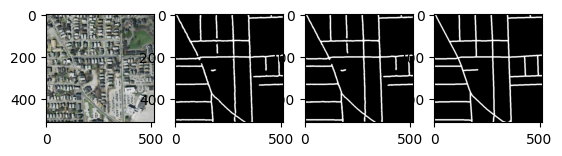

In [138]:
from matplotlib import pyplot
import cv2
import numpy as np

image_path = 'roadsdb/enhanced_images/2_17578885_15.tiff'
ground_path = 'roadsdb/new_train_labels/2_17578885_15.tif'

ground_img = cv2.imread(ground_path, cv2.IMREAD_GRAYSCALE)

g_model.load_weights('generators/cc_hc_80.h5')
prediction_image = cv2.imread(image_path)
prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)
input_tensor = (prediction_image - 127.5) / 127.5
print(input_tensor.shape)
predicted_img1 = g_model.predict(input_tensor.reshape((1, 512, 512, 3)))
predicted_img1 = np.squeeze(predicted_img1, axis=0)

g_model.load_weights('generators/cc_hc_mae_100.h5')
predicted_img2 = g_model.predict(input_tensor.reshape((1, 512, 512, 3)))
predicted_img2 = np.squeeze(predicted_img2, axis=0)

pyplot.subplot(1,4,1)
pyplot.imshow(prediction_image)
pyplot.subplot(1,4,2)
pyplot.imshow(predicted_img1, cmap='gray')
pyplot.subplot(1,4,3)
pyplot.imshow(predicted_img2, cmap='gray')
pyplot.subplot(1,4,4)
pyplot.imshow(ground_img, cmap="gray")
pyplot.show

(512, 512, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

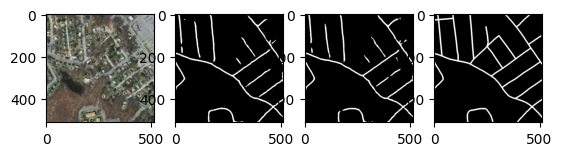

In [141]:
from matplotlib import pyplot
import cv2
import numpy as np

image_path = 'roadsdb/enhanced_test/17878885_15.tif_crop0_1.tiff'
ground_path = 'roadsdb/new_test_labels/17878885_15.tif_crop0_1.tiff'

ground_img = cv2.imread(ground_path, cv2.IMREAD_GRAYSCALE)

g_model.load_weights('generators/cc_hc_80.h5')
prediction_image = cv2.imread(image_path)
prediction_image = cv2.cvtColor(prediction_image, cv2.COLOR_BGR2RGB)
input_tensor = (prediction_image - 127.5) / 127.5
print(input_tensor.shape)

predicted_img1 = g_model.predict(input_tensor.reshape((1, 512, 512, 3)))
predicted_img1 = np.squeeze(predicted_img1, axis=0)

g_model.load_weights('generators/cc_hc_mae_100.h5')
predicted_img2 = g_model.predict(input_tensor.reshape((1, 512, 512, 3)))
predicted_img2 = np.squeeze(predicted_img2, axis=0)

pyplot.subplot(1,4,1)
pyplot.imshow(prediction_image)
pyplot.subplot(1,4,2)
pyplot.imshow(predicted_img1, cmap='gray')
pyplot.subplot(1,4,3)
pyplot.imshow(predicted_img2, cmap='gray')
pyplot.subplot(1,4,4)
pyplot.imshow(ground_img, cmap="gray")
pyplot.show

# Anonymous

C:\Users\glenn\anaconda3\envs\env_1\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


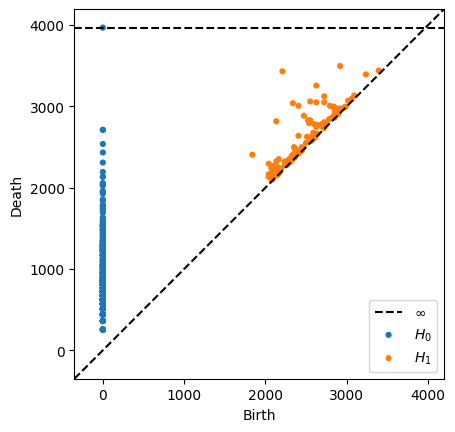

In [68]:
from ripser import ripser
from persim import plot_diagrams
from skimage import io

file = 'roadsdb/new_train_labels/1_17578885_15.tif'
img = io.imread(file)
diags = ripser(img)["dgms"]
plot_diagrams(diags, show=True)

In [ ]:
def train(d_model, g_model, gan_model, dataset, val_dataset, n_epochs=100, n_batch=1, n_patch=16, n_eval=5):
    trainA, trainB = dataset
    valA, valB = val_dataset
    bat_per_epo = int(len(trainA) / n_batch)
    n_steps = bat_per_epo * n_epochs
    for i in range(n_steps):
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        p_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        print('>%s, d1[%.3f] d2[%.3f] g[%.3f]' % (f'{i//796} epoch', d_loss1, d_loss2, p_loss))
        
        # Evaluate on validation set
        if i % (bat_per_epo * n_eval) == 0:
            val_loss = gan_model.evaluate(valA, [np.ones((len(valA), n_patch, n_patch, 1)), valB], verbose=0)
            print('>> Validation loss: %.3f' % (val_loss,))
        
    g_model.save_weights('generators/hc.h5')
    d_model.save_weights('discriminators/hc.h5')

In [ ]:
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1, n_patch=16, validation_data=None, patience=10):
    trainA, trainB = dataset
    valA, valB = val_dataset
    bat_per_epo = int(len(trainA) / n_batch)
    n_steps = bat_per_epo * n_epochs
    best_loss = np.inf
    early_stop_counter = 0
    for i in range(n_steps):
        [X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
        X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
        d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
        d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
        p_loss,_,_ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
        print('>%s, d1[%.3f] d2[%.3f] g[%.3f]' % (f'{i//796} epoch', d_loss1, d_loss2, p_loss))
        
        if validation_data is not None and (i+1) % bat_per_epo == 0:
            val_loss = gan_model.evaluate(valA, [np.ones((len(valA), n_patch, n_patch, 1)), valB], verbose=0)
            print('Validation loss: %.3f' % val_loss)
            if val_loss < best_loss:
                best_loss = val_loss
                g_model.save_weights('generators/hc.h5')
                d_model.save_weights('discriminators/hc.h5')
                early_stop_counter = 0
            else:
                early_stop_counter += 1
                if early_stop_counter >= patience:
                    print('Early stopping after %d epochs' % (i//bat_per_epo))
                    break
    g_model.load_weights('generators/hc.h5')
    d_model.load_weights('discriminators/hc.h5')


In [ ]:
valA, valB = val_dataset
val_loss = gan_model.evaluate(valA, [np.ones((len(valA), 16, 16, 1)), valB], verbose=0)

In [ ]:
val_loss

Number of holes: 3


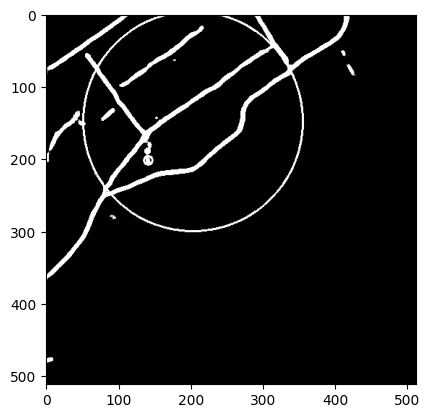

3

In [232]:
hole_counter(predicted_img)